# I. GETTING TO KNOW THE DATASET

In [50]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import numpy as np

In [51]:
crimes = pd.read_csv('crime.csv',
                     encoding='latin-1')
offense_codes = pd.read_csv('offense_codes.csv',
                            encoding='latin-1')

# crimes.profile_report().to_file("profilingCrimes.html")

#### Change index and make time series


In [52]:
crimes['OCCURRED_ON_DATE'] = pd.to_datetime(crimes['OCCURRED_ON_DATE'])
crimes = crimes.set_index('OCCURRED_ON_DATE')

In [53]:
crimes.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
OCCURRED_ON_DATE,,,,,,,,,,,,,,,,
2018-09-02 13:00:00,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
2018-08-21 00:00:00,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2018-09-03 19:27:00,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
2018-09-03 21:16:00,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
2018-09-03 21:05:00,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


#### Info on the number of districts


In [54]:
crimes.DISTRICT.unique()
crimes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 319073 entries, 2018-09-02 13:00:00 to 2015-06-22 00:12:00
Data columns (total 16 columns):
INCIDENT_NUMBER        319073 non-null object
OFFENSE_CODE           319073 non-null int64
OFFENSE_CODE_GROUP     319073 non-null object
OFFENSE_DESCRIPTION    319073 non-null object
DISTRICT               317308 non-null object
REPORTING_AREA         319073 non-null object
SHOOTING               1019 non-null object
YEAR                   319073 non-null int64
MONTH                  319073 non-null int64
DAY_OF_WEEK            319073 non-null object
HOUR                   319073 non-null int64
UCR_PART               318983 non-null object
STREET                 308202 non-null object
Lat                    299074 non-null float64
Long                   299074 non-null float64
Location               319073 non-null object
dtypes: float64(2), int64(4), object(10)
memory usage: 41.4+ MB


#### Info on null columns


In [55]:
null_columns = crimes.columns[crimes.isnull().any()]
crimes[null_columns].isnull().sum()

DISTRICT      1765
SHOOTING    318054
UCR_PART        90
STREET       10871
Lat          19999
Long         19999
dtype: int64

### Create df based on type of crimes


In [56]:
crimes_UCR1 = crimes.loc[crimes['UCR_PART'] == 'Part One']
crimes_UCR2 = crimes.loc[crimes['UCR_PART'] == 'Part Two']
crimes_UCR3 = crimes.loc[crimes['UCR_PART'] == 'Part Three']

#### Check null values in each column


In [57]:
null_columns = crimes_UCR1.columns[crimes.isnull().any()]
crimes_UCR1[null_columns].isnull().sum()

DISTRICT      218
SHOOTING    60966
UCR_PART        0
STREET       1379
Lat          2599
Long         2599
dtype: int64

In [58]:

null_columns = crimes_UCR2.columns[crimes.isnull().any()]
crimes_UCR2[null_columns].isnull().sum()

DISTRICT      514
SHOOTING    97385
UCR_PART        0
STREET       3426
Lat          6252
Long         6252
dtype: int64

In [59]:
null_columns = crimes_UCR2.columns[crimes.isnull().any()]
crimes_UCR3[null_columns].isnull().sum()

DISTRICT      1022
SHOOTING    158387
UCR_PART         0
STREET        6025
Lat          11068
Long         11068
dtype: int64

# II. SEASONALITY EXPLORATION
###  Plot crimes to look for patterns


#### For UCR Type One

In [60]:
nb_crimes_UCR1 = crimes_UCR1.index.value_counts().resample('D').sum()

In [61]:
nb_crimes_UCR1.head()

2015-06-15    54
2015-06-16    46
2015-06-17    62
2015-06-18    63
2015-06-19    76
Freq: D, Name: OCCURRED_ON_DATE, dtype: int64

In [62]:
type(nb_crimes_UCR1)

pandas.core.series.Series

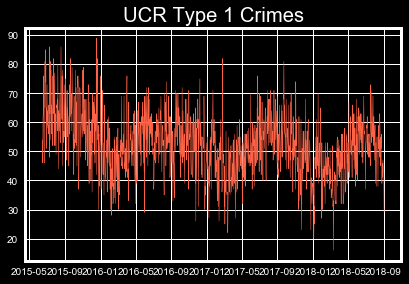

In [63]:
nb_crimes_UCR1 = crimes_UCR1.index.value_counts().resample('D').sum()
plt.plot(nb_crimes_UCR1, linewidth=0.5, color='#FF6347')
plt.title('UCR Type 1 Crimes')
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/UCR1_Crimes')
plt.show()

#### For UCR Type Two

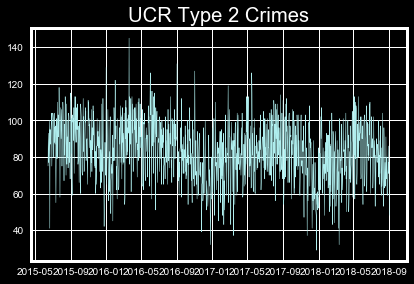

In [64]:
nb_crimes_UCR2 = crimes_UCR2.index.value_counts().resample('D').sum()
plt.plot(nb_crimes_UCR2, linewidth=0.5, color='#AFEEEE')
plt.title('UCR Type 2 Crimes')
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/UCR2crimes')
plt.show()

#### For UCR Type Three

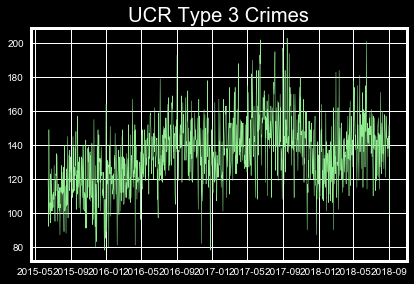

In [65]:
nb_crimes_UCR3 = crimes_UCR3.index.value_counts().resample('D').sum()
plt.plot(nb_crimes_UCR3, linewidth=0.5, color='#90EE90')
plt.title('UCR Type 3 Crimes')
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/UCR3crimes')
plt.show()

#### With the three of them

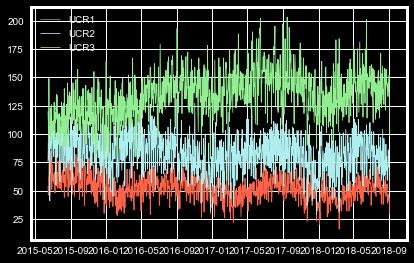

In [66]:
plt.plot(nb_crimes_UCR1.index, nb_crimes_UCR1, label='UCR1', linewidth=0.8, color='#FF6347')
plt.plot(nb_crimes_UCR2.index, nb_crimes_UCR2, label='UCR2', linewidth=0.8, color='#AFEEEE')
plt.plot(nb_crimes_UCR3.index, nb_crimes_UCR3, label='UCR3', linewidth=0.8, color='#90EE90')
plt.legend()
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/crimes')
plt.show()

## Let's explore the datasets a bit more

### Dataset start and end dates


In [67]:
print('Start: {} - End: {}'.format(min(crimes.index), max(crimes.index)))

Start: 2015-06-15 00:00:00 - End: 2018-09-03 21:25:00


### Look for aggregated weekday patterns
#### Aggregated through the whole time line

In [68]:
UCR1_days = crimes_UCR1.groupby(crimes_UCR1.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR2_days = crimes_UCR2.groupby(crimes_UCR2.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR3_days = crimes_UCR3.groupby(crimes_UCR3.DAY_OF_WEEK).count()['INCIDENT_NUMBER']

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

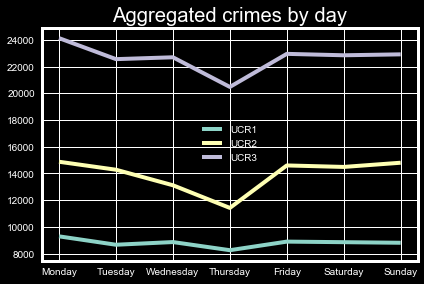

In [69]:
plt.plot(day_order, UCR1_days, label='UCR1')
plt.plot(day_order, UCR2_days, label='UCR2')
plt.plot(day_order, UCR3_days, label='UCR3')
plt.title('Aggregated crimes by day')
plt.legend()
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/crimes_by_days_agg')
plt.show()

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


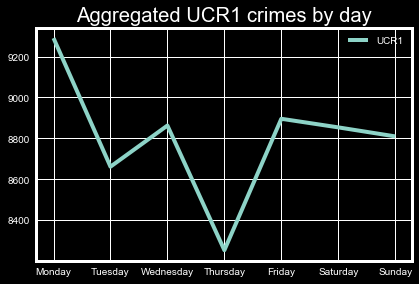

In [71]:
# Isolate type 1 to inspect it because it gets crushed
plt.plot(day_order, UCR1_days, label='UCR1')
plt.title('Aggregated UCR1 crimes by day')
plt.legend()
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/UCR1_crimes_per_day')
plt.show()

## Split data by year


In [72]:
UCR1_201516 = crimes_UCR1.loc['2015-06-15':'2016-06-14']
UCR1_201617 = crimes_UCR1.loc['2016-06-15':'2017-06-14']
UCR1_201718 = crimes_UCR1.loc['2017-06-15':'2018-06-14']
UCR1_201819 = crimes_UCR1.loc['2018-06-15':]

UCR2_201516 = crimes_UCR2.loc['2015-06-15':'2016-06-14']
UCR2_201617 = crimes_UCR2.loc['2016-06-15':'2017-06-14']
UCR2_201718 = crimes_UCR2.loc['2017-06-15':'2018-06-14']
UCR2_201819 = crimes_UCR2.loc['2018-06-15':]

UCR3_201516 = crimes_UCR3.loc['2015-06-15':'2016-06-14']
UCR3_201617 = crimes_UCR3.loc['2016-06-15':'2017-06-14']
UCR3_201718 = crimes_UCR3.loc['2017-06-15':'2018-06-14']
UCR3_201819 = crimes_UCR3.loc['2018-06-15':]

## Groups weekdays by year


In [73]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# For UCR1
UCR1_days_201516 = UCR1_201516.groupby(UCR1_201516.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR1_days_201617 = UCR1_201617.groupby(UCR1_201617.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR1_days_201718 = UCR1_201718.groupby(UCR1_201718.DAY_OF_WEEK).count()['INCIDENT_NUMBER']

# For UCR2
UCR2_days_201516 = UCR2_201516.groupby(UCR2_201516.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR2_days_201617 = UCR2_201617.groupby(UCR2_201617.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR2_days_201718 = UCR2_201718.groupby(UCR2_201718.DAY_OF_WEEK).count()['INCIDENT_NUMBER']

# For UCR3
UCR3_days_201516 = UCR3_201516.groupby(UCR3_201516.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR3_days_201617 = UCR3_201617.groupby(UCR3_201617.DAY_OF_WEEK).count()['INCIDENT_NUMBER']
UCR3_days_201718 = UCR3_201718.groupby(UCR3_201718.DAY_OF_WEEK).count()['INCIDENT_NUMBER']

#### Make a big plot with everything

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

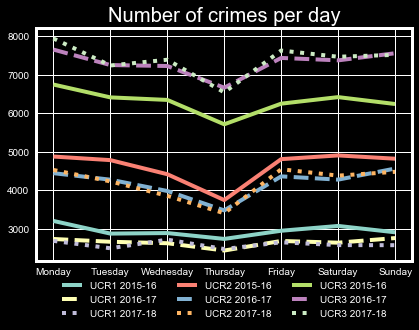

In [74]:
plt.plot(day_order, UCR1_days_201516, label='UCR1 2015-16', linestyle='-')
plt.plot(day_order, UCR1_days_201617, label='UCR1 2016-17', linestyle='--')
plt.plot(day_order, UCR1_days_201718, label='UCR1 2017-18', linestyle=':')
plt.plot(day_order, UCR2_days_201516, label='UCR2 2015-16', linestyle='-')
plt.plot(day_order, UCR2_days_201617, label='UCR2 2016-17', linestyle='--')
plt.plot(day_order, UCR2_days_201718, label='UCR2 2017-18', linestyle=':')
plt.plot(day_order, UCR3_days_201516, label='UCR3 2015-16', linestyle='-')
plt.plot(day_order, UCR3_days_201617, label='UCR3 2016-17', linestyle='--')
plt.plot(day_order, UCR3_days_201718, label='UCR3 2017-18', linestyle=':')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.title('Number of crimes per day')
# plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/crimes_per_day')
plt.show()

## Groups months by year

In [75]:
# For UCR1
UCR1_months_201516 = UCR1_201516.groupby(UCR1_201516.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR1_months_201617 = UCR1_201617.groupby(UCR1_201617.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR1_months_201718 = UCR1_201718.groupby(UCR1_201718.MONTH).count()['INCIDENT_NUMBER'].to_frame()

# For UCR2
UCR2_months_201516 = UCR2_201516.groupby(UCR2_201516.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR2_months_201617 = UCR2_201617.groupby(UCR2_201617.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR2_months_201718 = UCR2_201718.groupby(UCR2_201718.MONTH).count()['INCIDENT_NUMBER'].to_frame()

# For UCR3
UCR3_months_201516 = UCR3_201516.groupby(UCR3_201516.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR3_months_201617 = UCR3_201617.groupby(UCR3_201617.MONTH).count()['INCIDENT_NUMBER'].to_frame()
UCR3_months_201718 = UCR3_201718.groupby(UCR3_201718.MONTH).count()['INCIDENT_NUMBER'].to_frame()

#### Make a big plot with everything


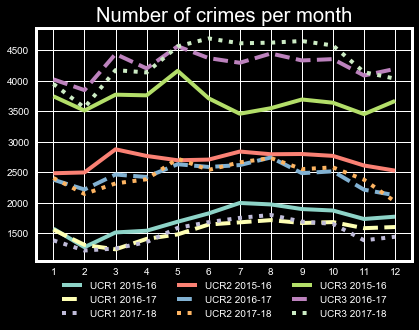

In [76]:
plt.plot(UCR1_months_201516.index, UCR1_months_201516, label='UCR1 2015-16', linestyle='-')
plt.plot(UCR1_months_201516.index, UCR1_months_201617, label='UCR1 2016-17', linestyle='--')
plt.plot(UCR1_months_201516.index, UCR1_months_201718, label='UCR1 2017-18', linestyle=':')
plt.plot(UCR1_months_201516.index, UCR2_months_201516, label='UCR2 2015-16', linestyle='-')
plt.plot(UCR1_months_201516.index, UCR2_months_201617, label='UCR2 2016-17', linestyle='--')
plt.plot(UCR1_months_201516.index, UCR2_months_201718, label='UCR2 2017-18', linestyle=':')
plt.plot(UCR1_months_201516.index, UCR3_months_201516, label='UCR3 2015-16', linestyle='-')
plt.plot(UCR1_months_201516.index, UCR3_months_201617, label='UCR3 2016-17', linestyle='--')
plt.plot(UCR1_months_201516.index, UCR3_months_201718, label='UCR3 2017-18', linestyle=':')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.xticks(range(1,13))
plt.title('Number of crimes per month')
#plt.savefig('/Users/macbookair/GitKraken/BostonCrime/Seasonality/crimes_per_month')
plt.show()

# II. GEOSPATIAL VISUALIZATION

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import fbprophet
import seaborn as sns
plt.style.use('fivethirtyeight')

In [78]:
# Read data
df = pd.read_csv('crime.csv', encoding='iso-8859-1')#offense_codes = pd.read_csv('offense_codes.csv', encoding='iso-8859-1')

In [79]:
df.columns = [str.lower(col) for col in df.columns]

In [80]:
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)"
319069,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319070,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)"
319071,I010370257-00,3125,Warrant Arrests,WARRANT ARREST,E13,569,NaN,2016-05-31 19:35:00,2016,5,Tuesday,19,Part Three,NEW WASHINGTON ST,42.302333,-71.111565,"(42.30233307, -71.11156487)"


In [81]:
df['date'] = df.occurred_on_date.apply(lambda x: x[:10])
df['date'] = pd.to_datetime(df.date)
df.sort_values(by=['date'], inplace=True, ascending=True)
df.reset_index()

,index,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
0,318551,I152049699,3802,Motor Vehicle Accident Response,M/V ACCIDENT - PROPERTY DAMAGE,NaN,,NaN,2015-06-15 17:13:00,2015,6,Monday,17,Part Three,NaN,NaN,NaN,"(0.00000000, 0.00000000)",2015-06-15
1,318586,I152049645,1102,Fraud,FRAUD - FALSE PRETENSE / SCHEME,E5,732,NaN,2015-06-15 14:00:00,2015,6,Monday,14,Part Two,DENT ST,42.282951,-71.162866,"(42.28295084, -71.16286564)",2015-06-15
2,318585,I152049646,2905,Violations,VAL - OPERATING WITHOUT LICENSE,B2,286,NaN,2015-06-15 16:04:00,2015,6,Monday,16,Part Two,RUGGLES ST,42.334912,-71.088464,"(42.33491200, -71.08846400)",2015-06-15
3,318584,I152049647,3205,License Plate Related Incidents,M/V PLATES - LOST,A7,26,NaN,2015-06-15 16:30:00,2015,6,Monday,16,Part Three,BORDER ST,42.382292,-71.040364,"(42.38229155, -71.04036424)",2015-06-15
4,318581,I152049649,3125,Warrant Arrests,WARRANT ARREST,C11,335,NaN,2015-06-15 16:20:00,2015,6,Monday,16,Part Three,HAMILTON ST,42.308169,-71.069649,"(42.30816879, -71.06964861)",2015-06-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319068,123,I182070802,3001,Medical Assistance,DEATH INVESTIGATION,A15,56,NaN,2018-09-03 11:49:00,2018,9,Monday,11,Part Three,HIGH ST,42.376041,-71.062112,"(42.37604137, -71.06211228)",2018-09-03
319069,121,I182070804,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,D14,756,NaN,2018-09-03 11:00:00,2018,9,Monday,11,Part One,CHAMPNEY ST,42.352412,-71.168788,"(42.35241230, -71.16878833)",2018-09-03
319070,119,I182070806,1501,Firearm Violations,"WEAPON - FIREARM - CARRYING / POSSESSING, ETC",C11,361,NaN,2018-09-03 12:23:00,2018,9,Monday,12,Part Two,DORCHESTER AVE,42.293288,-71.062195,"(42.29328831, -71.06219497)",2018-09-03
319071,132,I182070793,3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,C11,344,NaN,2018-09-03 10:33:00,2018,9,Monday,10,Part Three,WESTVILLE TER,42.300980,-71.068699,"(42.30098009, -71.06869928)",2018-09-03


## District-level monthly distribution by UCR type by district

In [82]:
# Subset of main df with respect to ucr_part
partone = df[df.ucr_part == 'Part One']
parttwo = df[df.ucr_part == 'Part Two']
partthree = df[df.ucr_part == 'Part Three']

In [83]:
# List of distinct districts
districts = df.district.unique()
districts

array([nan, 'E5', 'B2', 'A7', 'C11', 'D4', 'B3', 'E18', 'C6', 'A15',
       'D14', 'A1', 'E13'], dtype=object)

In [84]:
# Part 1 monthly crime count

partone_D14 = pd.DataFrame(partone[partone.district=='D14'].groupby('month').count()['ucr_part'])
partone_C11 = pd.DataFrame(partone[partone.district=='C11'].groupby('month').count()['ucr_part'])
partone_D4 = pd.DataFrame(partone[partone.district=='D4'].groupby('month').count()['ucr_part'])
partone_B3 = pd.DataFrame(partone[partone.district=='B3'].groupby('month').count()['ucr_part'])
partone_B2 = pd.DataFrame(partone[partone.district=='B2'].groupby('month').count()['ucr_part'])
partone_C6 = pd.DataFrame(partone[partone.district=='C6'].groupby('month').count()['ucr_part'])
partone_A1 = pd.DataFrame(partone[partone.district=='A1'].groupby('month').count()['ucr_part'])
partone_E5 = pd.DataFrame(partone[partone.district=='E5'].groupby('month').count()['ucr_part'])
partone_A7 = pd.DataFrame(partone[partone.district=='A7'].groupby('month').count()['ucr_part'])
partone_E13 = pd.DataFrame(partone[partone.district=='E13'].groupby('month').count()['ucr_part'])
partone_E18 = pd.DataFrame(partone[partone.district=='E18'].groupby('month').count()['ucr_part'])
partone_A15 = pd.DataFrame(partone[partone.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partone_A1, partone_A15, partone_A7, partone_B2, partone_B3, partone_C6, 
          partone_C11, partone_D14, partone_D4, partone_E13, partone_E18, partone_E5]

partone_districts = pd.concat(frames,axis=1)
partone_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partone_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,643,87,160,661,346,314,524,274,878,271,207,133
2,508,70,144,498,282,272,401,286,803,236,170,114
3,542,101,144,597,311,297,415,252,844,215,163,106
4,537,80,168,611,371,340,492,261,858,230,185,156
5,665,108,182,687,401,347,537,291,948,246,187,140
6,796,144,196,861,515,495,667,379,1171,371,253,177
7,1012,143,262,1046,540,502,808,377,1473,415,322,199
8,1028,132,245,1006,583,531,719,454,1377,390,298,226
9,822,106,207,762,392,359,557,393,1057,317,206,156


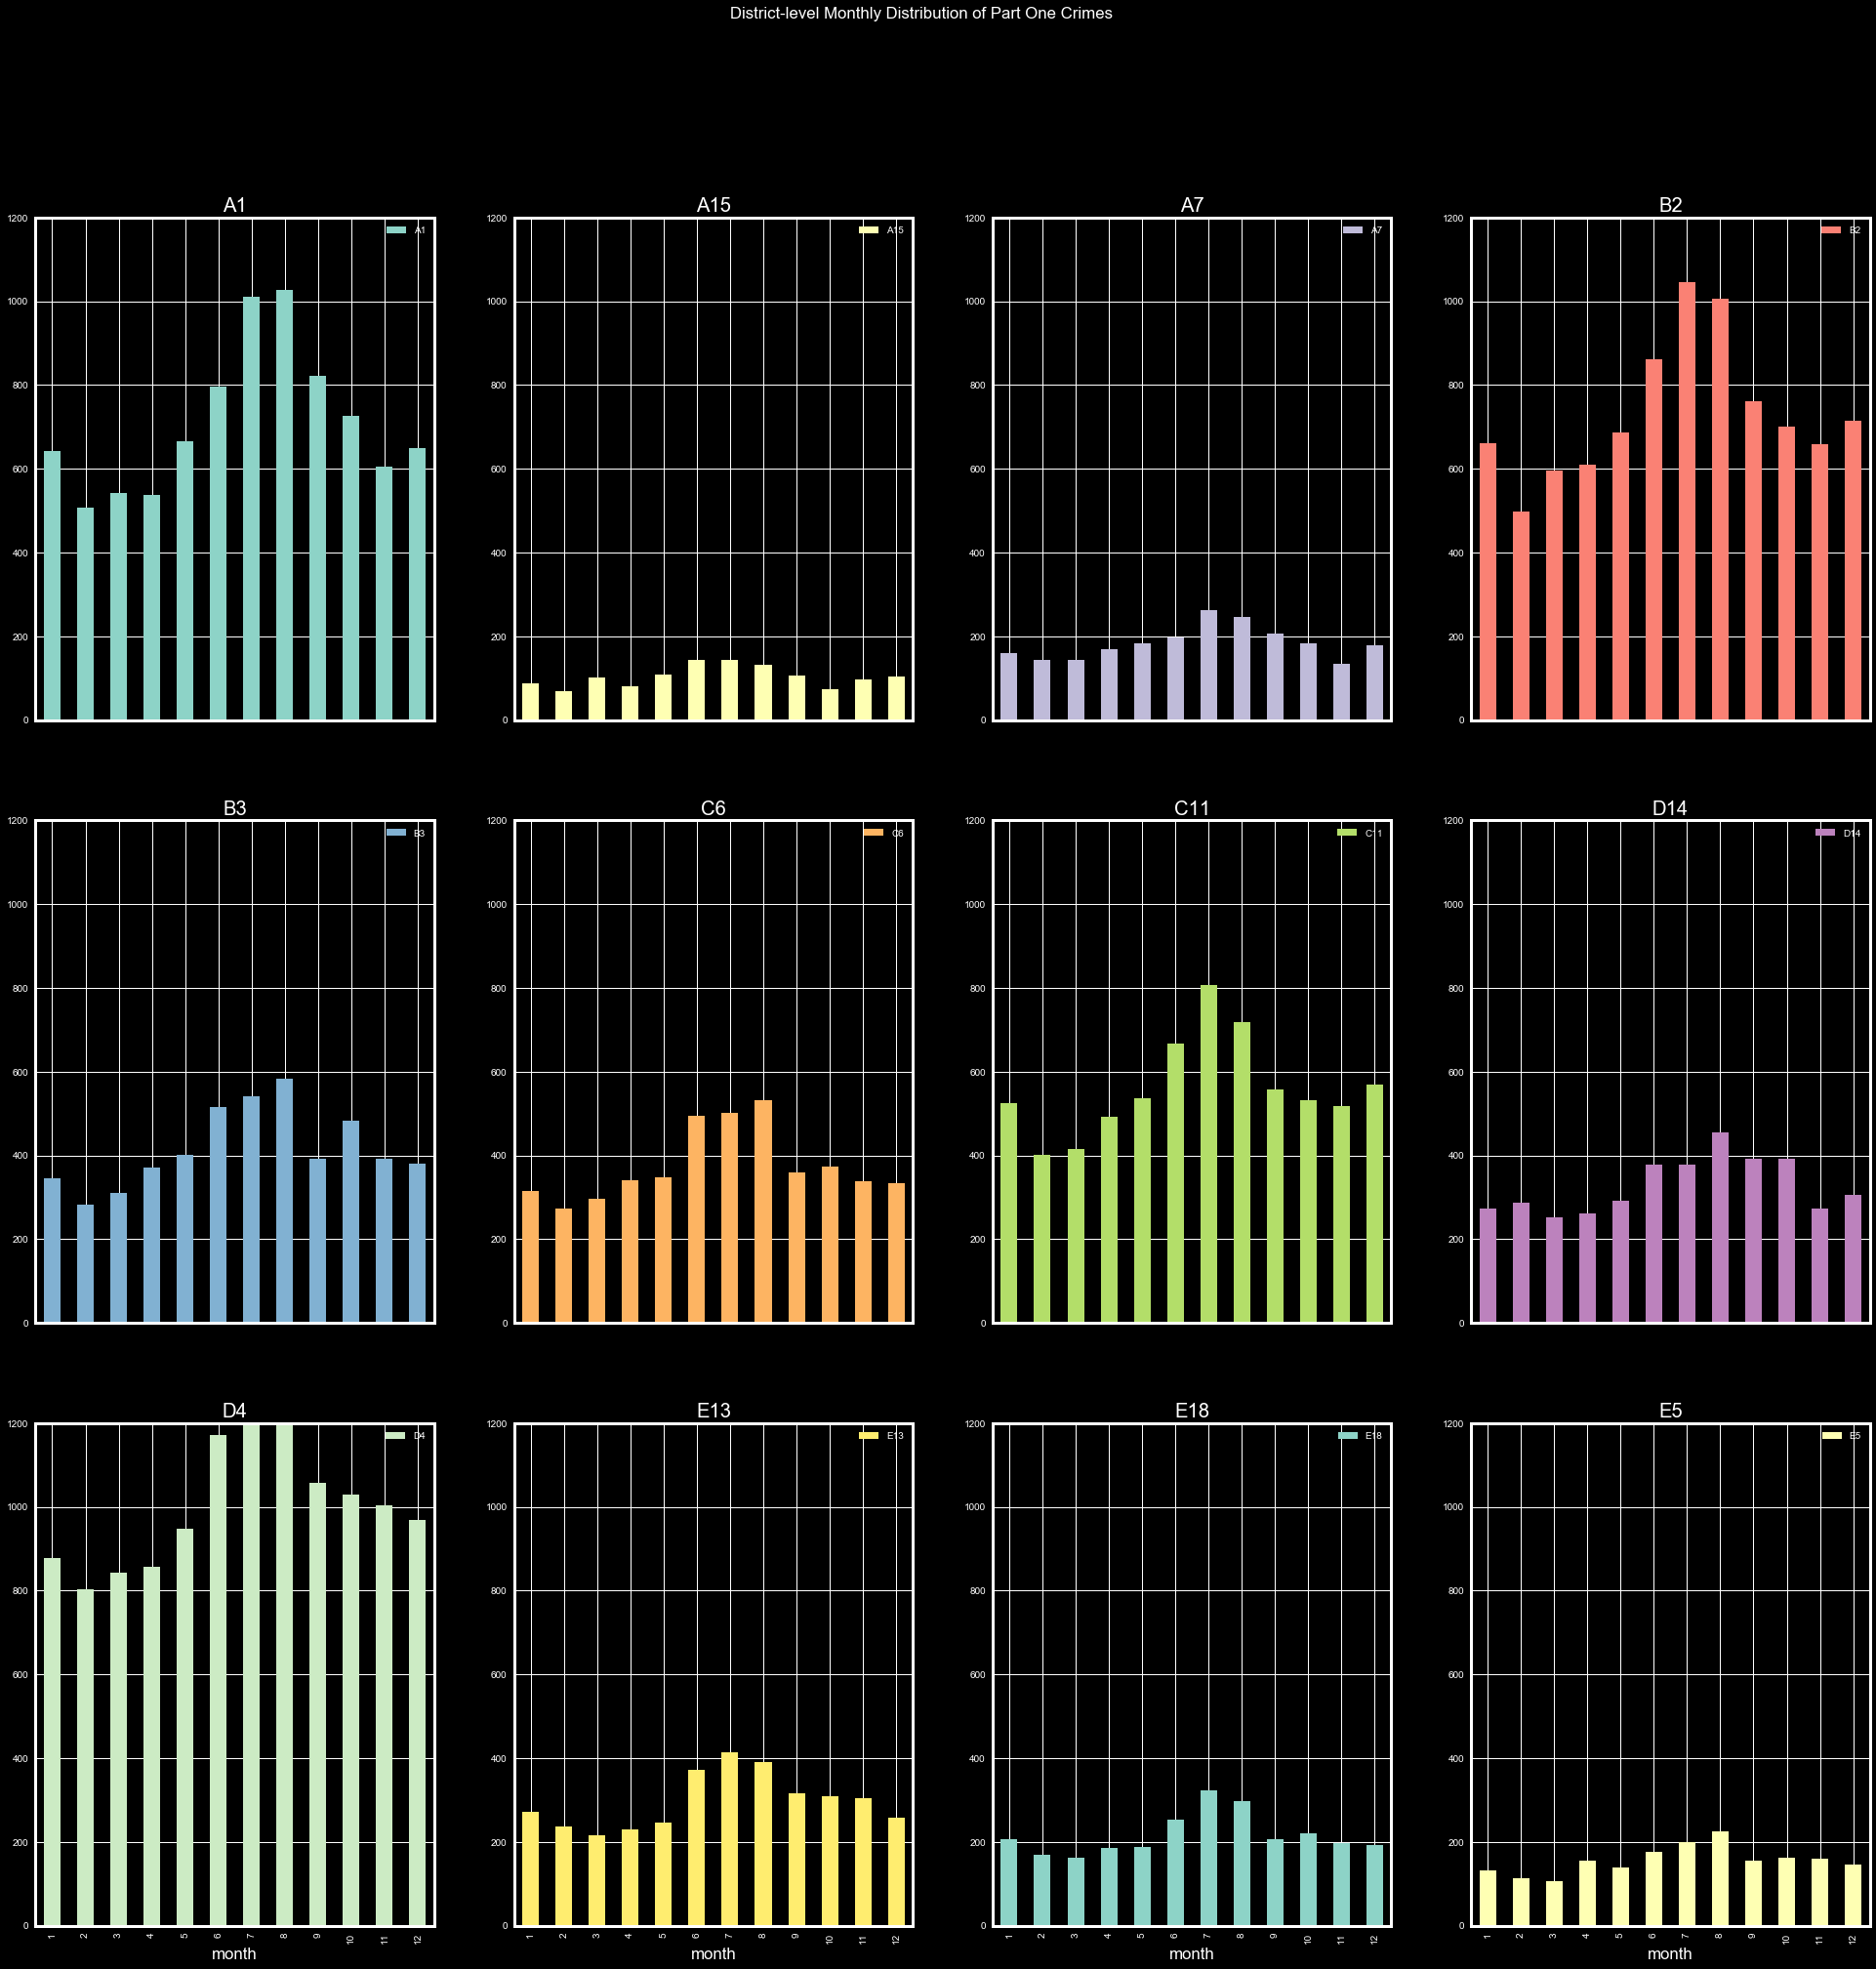

In [85]:
plt.style.use('dark_background')
partone_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1200),
                           title = 'District-level Monthly Distribution of Part One Crimes')
plt.show()

In [86]:
# Part 2 monthly crime count

parttwo_D14 = pd.DataFrame(parttwo[parttwo.district=='D14'].groupby('month').count()['ucr_part'])
parttwo_C11 = pd.DataFrame(parttwo[parttwo.district=='C11'].groupby('month').count()['ucr_part'])
parttwo_D4 = pd.DataFrame(parttwo[parttwo.district=='D4'].groupby('month').count()['ucr_part'])
parttwo_B3 = pd.DataFrame(parttwo[parttwo.district=='B3'].groupby('month').count()['ucr_part'])
parttwo_B2 = pd.DataFrame(parttwo[parttwo.district=='B2'].groupby('month').count()['ucr_part'])
parttwo_C6 = pd.DataFrame(parttwo[parttwo.district=='C6'].groupby('month').count()['ucr_part'])
parttwo_A1 = pd.DataFrame(parttwo[parttwo.district=='A1'].groupby('month').count()['ucr_part'])
parttwo_E5 = pd.DataFrame(parttwo[parttwo.district=='E5'].groupby('month').count()['ucr_part'])
parttwo_A7 = pd.DataFrame(parttwo[parttwo.district=='A7'].groupby('month').count()['ucr_part'])
parttwo_E13 = pd.DataFrame(parttwo[parttwo.district=='E13'].groupby('month').count()['ucr_part'])
parttwo_E18 = pd.DataFrame(parttwo[parttwo.district=='E18'].groupby('month').count()['ucr_part'])
parttwo_A15 = pd.DataFrame(parttwo[parttwo.district=='A15'].groupby('month').count()['ucr_part'])

frames = [parttwo_A1, parttwo_A15, parttwo_A7, parttwo_B2, parttwo_B3, parttwo_C6, 
          parttwo_C11, parttwo_D14, parttwo_D4, parttwo_E13, parttwo_E18, parttwo_E5]

parttwo_districts = pd.concat(frames,axis=1)
parttwo_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
parttwo_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,821,159,322,1204,800,547,1035,394,883,380,368,328
2,752,116,304,1126,778,504,962,384,840,406,387,276
3,797,129,335,1325,946,653,1042,393,916,410,366,308
4,822,133,346,1274,887,614,1051,398,879,431,424,299
5,939,152,343,1306,952,523,1192,489,968,447,405,307
6,968,181,445,1543,1083,619,1269,501,1161,487,523,378
7,1250,193,465,1683,1185,793,1519,562,1347,587,549,398
8,1302,187,481,1794,1235,851,1381,543,1271,537,545,391
9,900,164,358,1357,866,562,1107,455,970,462,392,347


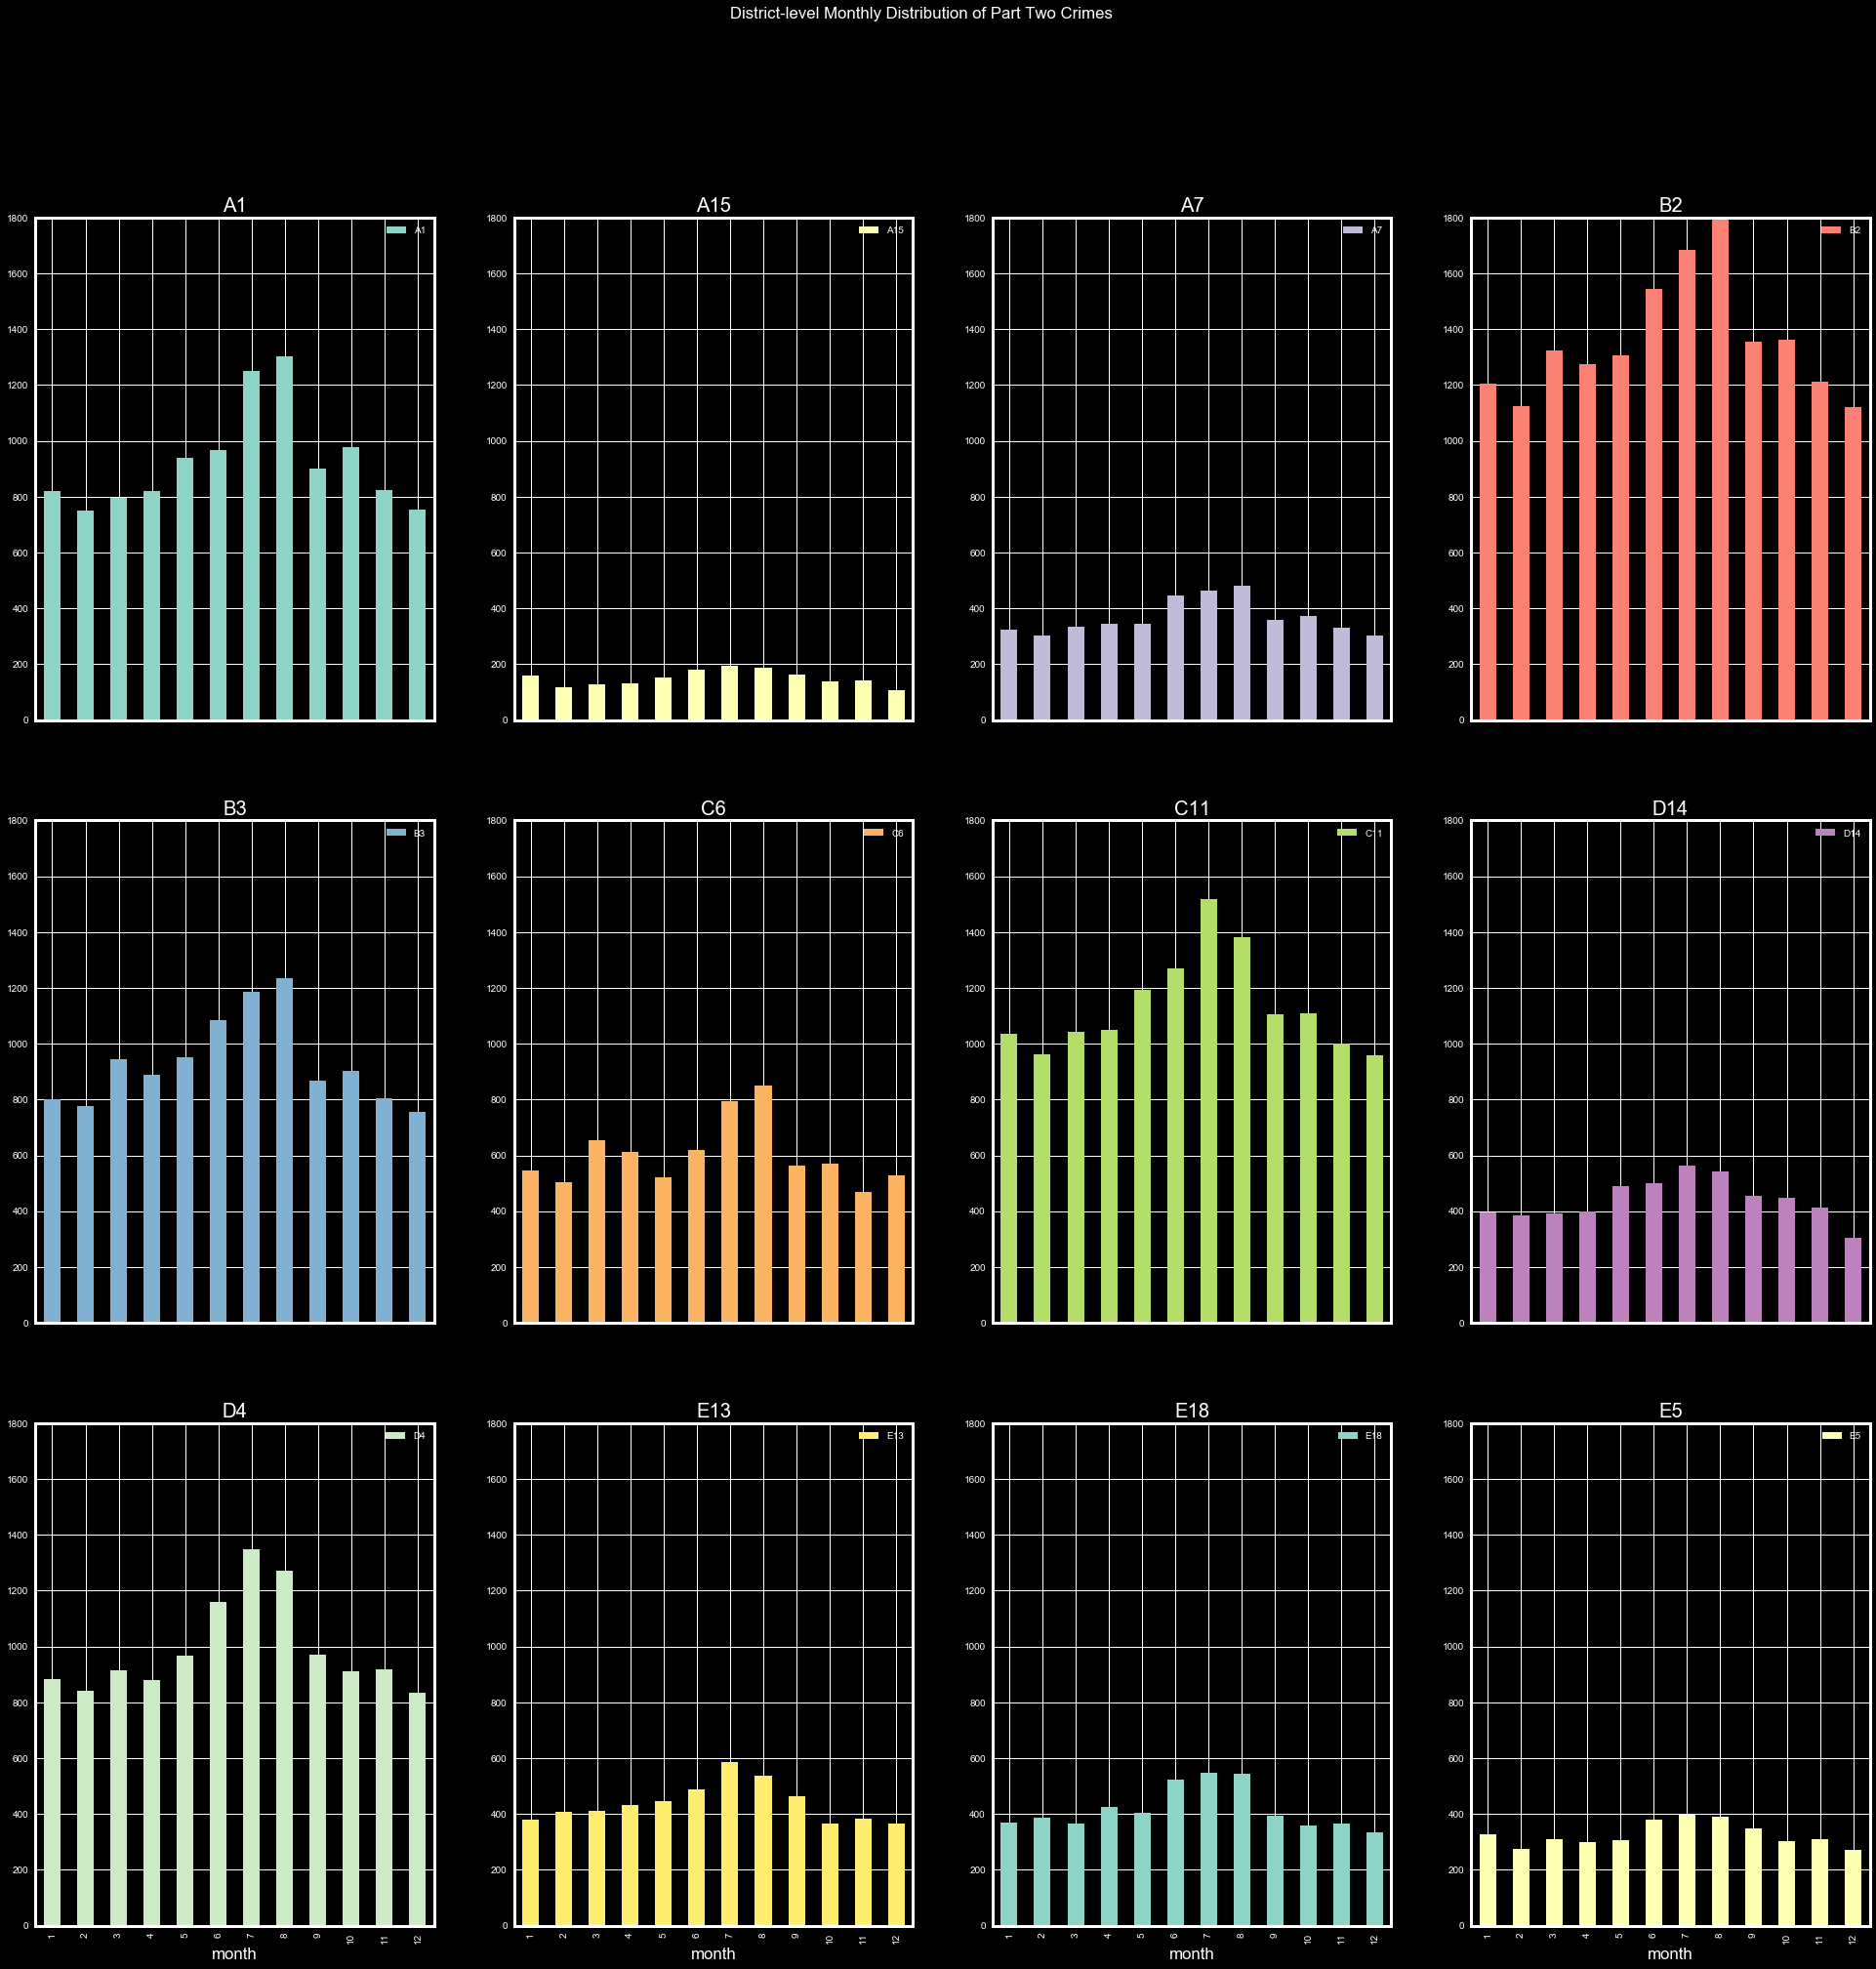

In [87]:
parttwo_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,1800),
                           title = 'District-level Monthly Distribution of Part Two Crimes')
plt.show()

In [88]:
# Part 3 monthly crime count

partthree_D14 = pd.DataFrame(partthree[partthree.district=='D14'].groupby('month').count()['ucr_part'])
partthree_C11 = pd.DataFrame(partthree[partthree.district=='C11'].groupby('month').count()['ucr_part'])
partthree_D4 = pd.DataFrame(partthree[partthree.district=='D4'].groupby('month').count()['ucr_part'])
partthree_B3 = pd.DataFrame(partthree[partthree.district=='B3'].groupby('month').count()['ucr_part'])
partthree_B2 = pd.DataFrame(partthree[partthree.district=='B2'].groupby('month').count()['ucr_part'])
partthree_C6 = pd.DataFrame(partthree[partthree.district=='C6'].groupby('month').count()['ucr_part'])
partthree_A1 = pd.DataFrame(partthree[partthree.district=='A1'].groupby('month').count()['ucr_part'])
partthree_E5 = pd.DataFrame(partthree[partthree.district=='E5'].groupby('month').count()['ucr_part'])
partthree_A7 = pd.DataFrame(partthree[partthree.district=='A7'].groupby('month').count()['ucr_part'])
partthree_E13 = pd.DataFrame(partthree[partthree.district=='E13'].groupby('month').count()['ucr_part'])
partthree_E18 = pd.DataFrame(partthree[partthree.district=='E18'].groupby('month').count()['ucr_part'])
partthree_A15 = pd.DataFrame(partthree[partthree.district=='A15'].groupby('month').count()['ucr_part'])

frames = [partthree_A1, partthree_A15, partthree_A7, partthree_B2, partthree_B3, partthree_C6, 
          partthree_C11, partthree_D14, partthree_D4, partthree_E13, partthree_E18, partthree_E5]

partthree_districts = pd.concat(frames,axis=1)
partthree_districts.columns=['A1','A15','A7','B2','B3','C6','C11','D14','D4','E13','E18','E5']
partthree_districts

,A1,A15,A7,B2,B3,C6,C11,D14,D4,E13,E18,E5
month,,,,,,,,,,,,
1,1089,233,549,1897,1516,878,1650,752,1150,639,755,560
2,1079,256,497,1660,1300,779,1539,727,1208,597,712,527
3,1252,272,499,2010,1413,935,1698,811,1349,673,766,644
4,1220,261,561,1982,1446,881,1648,741,1375,695,683,554
5,1290,302,574,2034,1623,926,1850,947,1476,760,859,613
6,1477,359,673,2388,1772,1110,2023,1027,1735,834,972,702
7,1760,343,661,2525,2013,1233,2317,1168,1836,880,991,769
8,1847,377,731,2497,2130,1193,2381,1165,1854,915,1020,799
9,1343,259,532,2017,1535,990,1858,970,1474,672,719,579


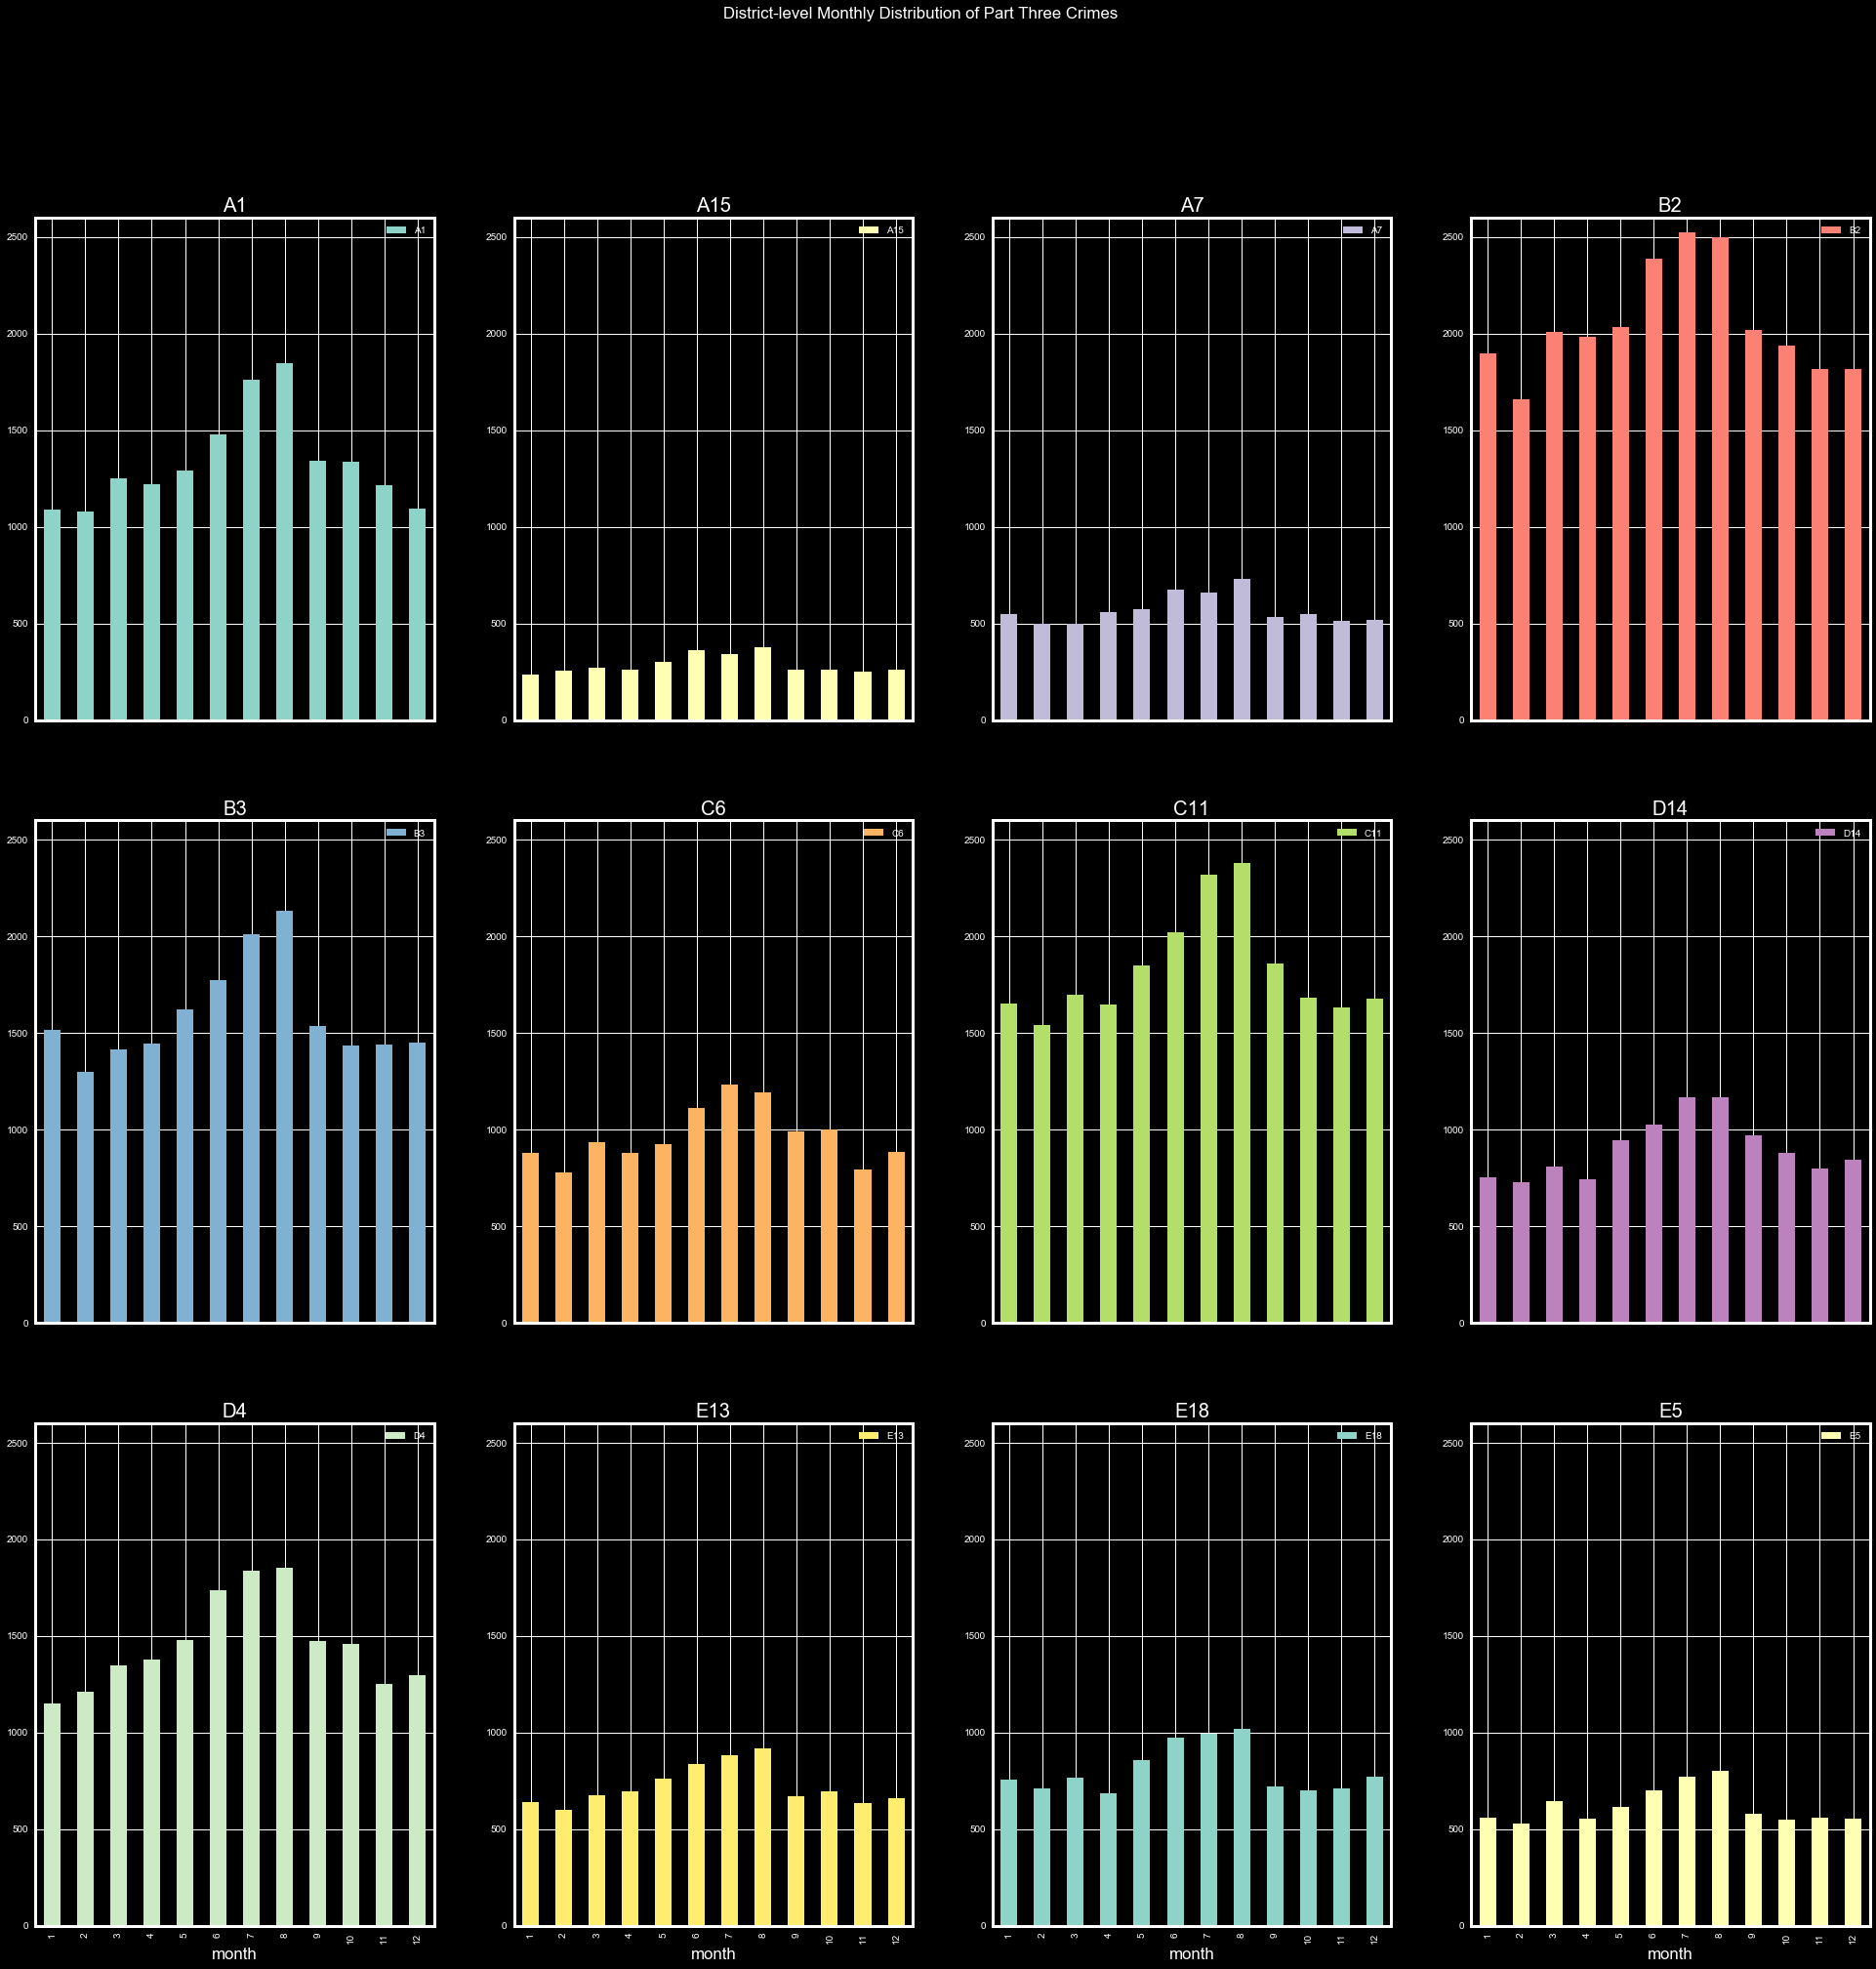

In [89]:
partthree_districts.plot.bar(subplots=True,
                           layout=(3,4), 
                           figsize = (30,30), 
                           ylim=(0,2600),
                           title = 'District-level Monthly Distribution of Part Three Crimes')
plt.show()

### Setting a slider

In [90]:
from ipywidgets import *

In [91]:
slider = IntSlider(value=50)
slider

IntSlider(value=50)

In [92]:
slider.value = 100

In [93]:
text = HTML("The slider's value is <b>{}</b>".format(slider.value))
text

HTML(value="The slider's value is <b>100</b>")

In [94]:
def update_html(change): 
    text.value = "The slider's value is <b>{}</b>".format(slider.value)
    
slider.observe(update_html, 'value')

In [95]:
#weeks = [g for n, g in df.groupby(pd.Grouper(key='date',freq='W'))]

## Geospatial visualization

In [96]:
from ipyleaflet import *

In [97]:
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)
m.add_control(FullScreenControl())
m.add_control(LayersControl())

In [98]:
# Split ucr_part dfs - partone, parttwo and partthree - in weekly dataframes.
# Problem of readability because 'week 168' does not mean much. 
# Might be better to add a 'weekcount' column on the original dfs,
    # if you could figure it out.

weekly_partone = [g for n, g in partone.groupby(pd.Grouper(key='date',freq='W'))]
weekly_parttwo = [g for n, g in parttwo.groupby(pd.Grouper(key='date',freq='W'))]
weekly_partthree = [g for n, g in partthree.groupby(pd.Grouper(key='date',freq='W'))]

In [99]:
#tests, get crimes on week w

weekly_partone[168]
#weekly_partone[65]
#weekly_parttwo[-1]
#weekly_partthree[0]

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
54,I182070874,617,Larceny,LARCENY THEFT FROM BUILDING,A1,102,NaN,2018-09-03 16:00:00,2018,9,Monday,16,Part One,WINTER ST,42.356024,-71.061776,"(42.35602373, -71.06177615)",2018-09-03
60,I182070868,616,Larceny,LARCENY THEFT OF BICYCLE,D14,790,NaN,2018-09-03 06:15:00,2018,9,Monday,6,Part One,CHESTNUT HILL AVE,42.335400,-71.150257,"(42.33539970, -71.15025675)",2018-09-03
62,I182070865,301,Robbery,ROBBERY - STREET,NaN,,NaN,2018-09-03 15:54:00,2018,9,Monday,15,Part One,NaN,42.315809,-71.098290,"(42.31580852, -71.09829029)",2018-09-03
85,I182070838,613,Larceny,LARCENY SHOPLIFTING,D4,146,NaN,2018-09-03 14:00:00,2018,9,Monday,14,Part One,HUNTINGTON AVE,42.347972,-71.078496,"(42.34797240, -71.07849582)",2018-09-03
79,I182070844,724,Auto Theft,AUTO THEFT,D4,154,NaN,2018-09-03 15:01:00,2018,9,Monday,15,Part One,TREMONT ST,42.341129,-71.076930,"(42.34112890, -71.07692951)",2018-09-03
78,I182070846,613,Larceny,LARCENY SHOPLIFTING,C11,381,NaN,2018-09-03 14:07:00,2018,9,Monday,14,Part One,GALLIVAN BLVD,42.285124,-71.044057,"(42.28512354, -71.04405667)",2018-09-03
70,I182070856,613,Larceny,LARCENY SHOPLIFTING,D4,138,NaN,2018-09-03 14:31:00,2018,9,Monday,14,Part One,NEWBURY ST,42.350597,-71.078810,"(42.35059717, -71.07881031)",2018-09-03
8,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",2018-09-03
6,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",2018-09-03
24,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)",2018-09-03


In [100]:
districts

array([nan, 'E5', 'B2', 'A7', 'C11', 'D4', 'B3', 'E18', 'C6', 'A15',
       'D14', 'A1', 'E13'], dtype=object)

In [101]:
# Part One crimes per district on week 65

week_partone = weekly_partone[65]


# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)

    
 # create part one crime locations layer
for (index, row) in week_partone.iterrows():
    marker = CircleMarker(location=[row.loc['lat'], row.loc['long']])
    marker.radius = 1
    if row.loc['district'] == 'A1':
        marker.color = "#AFEEEE"
        marker.fill_color = "#AFEEEE"
    elif row.loc['district'] == 'A7':
        marker.color = "#E6E6FA"
        marker.fill_color = "#E6E6FA"
    elif row.loc['district'] == 'A15':
        marker.color = "#FAFAD2"
        marker.fill_color = "#FAFAD2"
    elif row.loc['district'] == 'B3':
        marker.color = "#87CEEB"
        marker.fill_color = "#87CEEB"
    elif row.loc['district'] == 'B2':
        marker.color = "#FF6347"
        marker.fill_color = "#FF6347"
    elif row.loc['district'] == 'C6':
        marker.color = "#FFA500"
        marker.fill_color = "#FFA500"
    elif row.loc['district'] == 'C11':
        marker.color = "#90EE90"
        marker.fill_color = "#90EE90"
    elif row.loc['district'] == 'D4':
        marker.color = "#7FFFD4"
        marker.fill_color = "#7FFFD4"
    elif row.loc['district'] == 'D14':
        marker.color = "#DDA0DD"
        marker.fill_color = "#DDA0DD"
    elif row.loc['district'] == 'E5':
        marker.color = "#FFFACD"
        marker.fill_color = "#FFFACD"
    elif row.loc['district'] == 'E13':
        marker.color = "#EEE8AA"
        marker.fill_color = "#EEE8AA"
    elif row.loc['district'] == 'E18':
        marker.color = "#B0E0E6"
        marker.fill_color = "#B0E0E6"
    else:
        marker.color = "black"
        marker.fill_color = "black"

    # add heatmap layer to map
    m.add_layer(marker)
    
marker2 = CircleMarker(location=(42.361145,-71.057083))
m.add_layer(marker2)
m.add_control(FullScreenControl())
m.add_control(LayersControl())
    # display map


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

In [102]:
# reset map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)

In [103]:
# Part Two crimes per district on week 160

week_parttwo = weekly_parttwo[160]


# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)

    
 # create part one crime locations layer
for (index, row) in week_parttwo.iterrows():
    marker = CircleMarker(location=[row.loc['lat'], row.loc['long']])
    marker.radius = 1
    if row.loc['district'] == 'A1':
        marker.color = "#AFEEEE"
        marker.fill_color = "#AFEEEE"
    elif row.loc['district'] == 'A7':
        marker.color = "#E6E6FA"
        marker.fill_color = "#E6E6FA"
    elif row.loc['district'] == 'A15':
        marker.color = "#FAFAD2"
        marker.fill_color = "#FAFAD2"
    elif row.loc['district'] == 'B3':
        marker.color = "#87CEEB"
        marker.fill_color = "#87CEEB"
    elif row.loc['district'] == 'B2':
        marker.color = "#FF6347"
        marker.fill_color = "#FF6347"
    elif row.loc['district'] == 'C6':
        marker.color = "#FFA500"
        marker.fill_color = "#FFA500"
    elif row.loc['district'] == 'C11':
        marker.color = "#90EE90"
        marker.fill_color = "#90EE90"
    elif row.loc['district'] == 'D4':
        marker.color = "#7FFFD4"
        marker.fill_color = "#7FFFD4"
    elif row.loc['district'] == 'D14':
        marker.color = "#DDA0DD"
        marker.fill_color = "#DDA0DD"
    elif row.loc['district'] == 'E5':
        marker.color = "#FFFACD"
        marker.fill_color = "#FFFACD"
    elif row.loc['district'] == 'E13':
        marker.color = "#EEE8AA"
        marker.fill_color = "#EEE8AA"
    elif row.loc['district'] == 'E18':
        marker.color = "#B0E0E6"
        marker.fill_color = "#B0E0E6"
    else:
        marker.color = "black"
        marker.fill_color = "black"

    # add heatmap layer to map
    m.add_layer(marker)
m.add_control(FullScreenControl())
m.add_control(LayersControl())
    # display map


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

In [104]:
# reset map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)

In [105]:
# Part Three crimes per district on week 5

week_partthree = weekly_partthree[5]


# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)

    
 # create part one crime locations layer
for (index, row) in week_partthree.iterrows():
    marker = CircleMarker(location=[row.loc['lat'], row.loc['long']])
    marker.radius = 1
    if row.loc['district'] == 'A1':
        marker.color = "#AFEEEE"
        marker.fill_color = "#AFEEEE"
    elif row.loc['district'] == 'A7':
        marker.color = "#E6E6FA"
        marker.fill_color = "#E6E6FA"
    elif row.loc['district'] == 'A15':
        marker.color = "#FAFAD2"
        marker.fill_color = "#FAFAD2"
    elif row.loc['district'] == 'B3':
        marker.color = "#87CEEB"
        marker.fill_color = "#87CEEB"
    elif row.loc['district'] == 'B2':
        marker.color = "#FF6347"
        marker.fill_color = "#FF6347"
    elif row.loc['district'] == 'C6':
        marker.color = "#FFA500"
        marker.fill_color = "#FFA500"
    elif row.loc['district'] == 'C11':
        marker.color = "#90EE90"
        marker.fill_color = "#90EE90"
    elif row.loc['district'] == 'D4':
        marker.color = "#7FFFD4"
        marker.fill_color = "#7FFFD4"
    elif row.loc['district'] == 'D14':
        marker.color = "#DDA0DD"
        marker.fill_color = "#DDA0DD"
    elif row.loc['district'] == 'E5':
        marker.color = "#FFFACD"
        marker.fill_color = "#FFFACD"
    elif row.loc['district'] == 'E13':
        marker.color = "#EEE8AA"
        marker.fill_color = "#EEE8AA"
    elif row.loc['district'] == 'E18':
        marker.color = "#B0E0E6"
        marker.fill_color = "#B0E0E6"
    else:
        marker.color = "black"
        marker.fill_color = "black"

    # add heatmap layer to map
    m.add_layer(marker)
m.add_control(FullScreenControl())
m.add_control(LayersControl())
    # display map


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

## Weekly Part One Crime Map

In [106]:
# Part One crimes per district on week 5

from ipywidgets import HTML
from ipyleaflet import LayersControl
from ipyleaflet import Map, Marker, Popup

week_partone = weekly_partone[5]

icon = Icon(icon_url='https://www.vectortemplates.com/bincdn2/files/editor_images/Batman-logo-seeklogo.com_.png'
            ,icon_size=[15, 15], icon_anchor=[15,15])



# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True,
        close_popup_on_click=False,
        title='Weekly Type I Crimes')

 # create part one crime locations layer
for (index, row) in week_partone.iterrows():
    marker1 = Marker(location=[row.loc['lat'], row.loc['long']],
                    rise_on_hover=True,
                    icon=icon,
                    title=str([row.loc['offense_code_group'],
                    row.loc['occurred_on_date']]),
                    keyboard=True)


   
    # add heatmap layer to map
    # Add crime_info pop up
    crime_info = HTML()
    crime_info.layout.margin = '0px 20px 20px 20px'
    crime_info.value = str([row.loc['offense_code_group'],
                    row.loc['occurred_on_date'],
                    row.loc['district']])
    crime_info.placeholder = "Crime Info"
    crime_info.description = "Crime Info"
    marker1.popup = crime_info
    m.add_layer(marker1)

# Add title 

Title = HTML('''
            <h4>Weekly Type I Crimes in Boston Area</h4>
''')
Title.layout.margin = '0px 10px 10px 10px'
control = WidgetControl(widget=Title, position='topright')
m.add_control(control)
m.add_layer(control)
    
    
m.add_control(FullScreenControl())
m.add_control(LayersControl())


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

## Weekly Part Two Crime Map

In [107]:
# Part Two crimes per district on week 5

from ipywidgets import HTML
from ipyleaflet import LayersControl
from ipyleaflet import Map, Marker, Popup

week_parttwo = weekly_parttwo[5]

icon = Icon(icon_url='https://www.vectortemplates.com/bincdn2/files/editor_images/Batman-logo-seeklogo.com_.png'
            ,icon_size=[15, 15], icon_anchor=[15,15])



# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True,
        close_popup_on_click=False,
        title='Weekly Type II Crimes')

 # create part two crime locations layer
for (index, row) in week_parttwo.iterrows():
    marker2 = Marker(location=[row.loc['lat'], row.loc['long']],
                    rise_on_hover=True,
                    icon=icon,
                    title=row.loc['offense_code_group'],
                    keyboard=True)


   
    # add heatmap layer to map
    # Add crime_info pop up
    crime_info = HTML()
    crime_info.layout.margin = '0px 20px 20px 20px'
    crime_info.value = str([row.loc['offense_code_group'],
                    row.loc['occurred_on_date'],
                    row.loc['district']])
    crime_info.placeholder = "Crime Info"
    crime_info.description = "Crime Info"
    marker2.popup = crime_info
    m.add_layer(marker2)

# Add title 

Title = HTML('''
            <h4>Weekly Type II Crimes in Boston Area</h4>
''')
Title.layout.margin = '0px 10px 10px 10px'
control = WidgetControl(widget=Title, position='topright')
m.add_control(control)
m.add_layer(control)
    
    
m.add_control(FullScreenControl())
m.add_control(LayersControl())


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

## Weekly Part Three Crime Map

In [108]:
# Part Three crimes per district on week 5

from ipywidgets import HTML
from ipyleaflet import LayersControl
from ipyleaflet import Map, Marker, Popup

week_partthree = weekly_partthree[5]

icon = Icon(icon_url='https://www.vectortemplates.com/bincdn2/files/editor_images/Batman-logo-seeklogo.com_.png'
            ,icon_size=[15, 15], icon_anchor=[15,15])



# create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True,
        close_popup_on_click=False,
        title='Weekly Type II Crimes')

 # create part three crime locations layer
for (index, row) in week_partthree.iterrows():
    marker3 = Marker(location=[row.loc['lat'], row.loc['long']],
                    rise_on_hover=True,
                    icon=icon,
                    title=row.loc['offense_code_group'],
                    keyboard=True)


   
    # add heatmap layer to map
    # Add crime_info pop up
    crime_info = HTML()
    crime_info.layout.margin = '0px 20px 20px 20px'
    crime_info.value = str([row.loc['offense_code_group'],
                    row.loc['occurred_on_date'],
                    row.loc['district']])
    crime_info.placeholder = "Crime Info"
    crime_info.description = "Crime Info"
    marker3.popup = crime_info
    m.add_layer(marker3)

# Add title 

Title = HTML('''
            <h4>Weekly Type III Crimes in Boston Area</h4>
''')
Title.layout.margin = '0px 10px 10px 10px'
control = WidgetControl(widget=Title, position='topright')
m.add_control(control)
m.add_layer(control)
    
    
m.add_control(FullScreenControl())
m.add_control(LayersControl())


    
# display map    
m

Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

In [109]:
# slider to get crimes for each date
# need to find a way to clear map before updating new slider value

import pandas as pd
import ipywidgets

# load data as dataframe
partone = partone[['date', 'district','lat', 'long']]
partone_sample = partone.head(50)


# plot part one crimes locations using widget
def plot_partone(date):
    c = partone.loc[partone['date'] == date]
    for (index, row) in c.iterrows():
        marker = Marker(location=[row.loc['lat'], row.loc['long']])
            #m.on_interaction(marker)
            #m.remove_layer(marker)
        m.add_layer(marker)
            #print(partone.loc[partone['date'] == date])
        

# create ipywidgets slider
selection_slider = ipywidgets.SelectionSlider(options=list(partone['date']),
                                              description='Slider',
                                              disabled=False,
                                              continuous_update=False,
                                              orientation='horizontal',
                                              readout=True)

#def update_map(change): 
    #date.value = selection_slider.value
    
#selection_slider.observe(update_map, 'value')

# Reload map to clear past slides - to be solved -

#create map
m = Map(center = (42.361145,-71.057083),
        zoom=10,
        basemap=basemaps.CartoDB.DarkMatter,
        dragging=True,
        keyboard=True)



# display map
display(m)

ipywidgets.interact(plot_partone, date=selection_slider)



Map(basemap={'url': 'http://c.basemaps.cartocdn.com/dark_all/{z}/{x}/{y}.png', 'max_zoom': 20, 'attribution': …

interactive(children=(SelectionSlider(continuous_update=False, description='Slider', options=(Timestamp('2015-…

<function __main__.plot_partone(date)>

## Aggregated Crime Map - Type I

In [111]:
df = pd.read_csv('crime.csv', encoding='iso-8859-1')
offense_codes = pd.read_csv('offense_codes.csv', encoding='iso-8859-1')

In [112]:
import json
with open('Police_Districts.geojson', 'r') as f:
  data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'Police_Districts.geojson'

# IV. Autocorrelations and partial autocorrelations

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')
#plt.style.use('fivethirtyeight')

In [117]:
df = pd.read_csv('/Users/macbookair/PycharmProjects/Big Data Analytics/Crimes in Boston/crime.csv', encoding='iso-8859-1')

In [118]:
df.columns = [str.lower(col) for col in df.columns]
df['date'] = df.occurred_on_date.apply(lambda x: x[:10])
df = df.set_index(df.date)

In [119]:
df

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
date,,,,,,,,,,,,,,,,,,
2018-09-02,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02
2018-08-21,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",2018-08-21
2018-09-03,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",2018-09-03
2018-09-03,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",2018-09-03
2018-09-03,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-06-05,I050310906-00,3125,Warrant Arrests,WARRANT ARREST,D4,285,NaN,2016-06-05 17:25:00,2016,6,Sunday,17,Part Three,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05
2015-07-09,I030217815-08,111,Homicide,"MURDER, NON-NEGLIGIENT MANSLAUGHTER",E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part One,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09
2015-07-09,I030217815-08,3125,Warrant Arrests,WARRANT ARREST,E18,520,NaN,2015-07-09 13:38:00,2015,7,Thursday,13,Part Three,RIVER ST,42.255926,-71.123172,"(42.25592648, -71.12317207)",2015-07-09


#### Split data into UCR types

In [120]:
ucr1 = df[df.ucr_part == "Part One"]
ucr2 = df[df.ucr_part == "Part Two"]
ucr3 = df[df.ucr_part == "Part Three"]

In [121]:
ucr1

,incident_number,offense_code,offense_code_group,offense_description,district,reporting_area,shooting,occurred_on_date,year,month,day_of_week,hour,ucr_part,street,lat,long,location,date
date,,,,,,,,,,,,,,,,,,
2018-09-02,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",2018-09-02
2018-09-03,I182070933,724,Auto Theft,AUTO THEFT,B2,330,NaN,2018-09-03 21:25:00,2018,9,Monday,21,Part One,NORMANDY ST,42.306072,-71.082733,"(42.30607218, -71.08273260)",2018-09-03
2018-09-03,I182070931,301,Robbery,ROBBERY - STREET,C6,177,NaN,2018-09-03 20:48:00,2018,9,Monday,20,Part One,MASSACHUSETTS AVE,42.331521,-71.070853,"(42.33152148, -71.07085307)",2018-09-03
2018-09-02,I182070915,614,Larceny From Motor Vehicle,LARCENY THEFT FROM MV - NON-ACCESSORY,B2,181,NaN,2018-09-02 18:00:00,2018,9,Sunday,18,Part One,SHIRLEY ST,42.325695,-71.068168,"(42.32569490, -71.06816778)",2018-09-02
2018-09-03,I182070908,522,Residential Burglary,BURGLARY - RESIDENTIAL - NO FORCE,B2,911,NaN,2018-09-03 18:38:00,2018,9,Monday,18,Part One,ANNUNCIATION RD,42.335062,-71.093168,"(42.33506218, -71.09316781)",2018-09-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-07-29,I110261417-00,619,Larceny,LARCENY OTHER $200 & OVER,B2,324,NaN,2016-07-29 00:00:00,2016,7,Friday,0,Part One,BOWDOIN ST,42.307038,-71.066153,"(42.30703835, -71.06615319)",2016-07-29
2016-06-05,I100636670-00,629,Larceny,LARCENY OTHER $50 TO $199,D4,285,NaN,2016-06-05 17:23:00,2016,6,Sunday,17,Part One,COVENTRY ST,42.336951,-71.085748,"(42.33695098, -71.08574813)",2016-06-05
2015-07-27,I100340225-00,339,Robbery,ROBBERY - UNARMED - STREET,A1,77,NaN,2015-07-27 10:47:00,2015,7,Monday,10,Part One,BOWDOIN SQ,42.361645,-71.062299,"(42.36164502, -71.06229949)",2015-07-27


In [122]:
df.district.unique()


array(['D14', 'C11', 'D4', 'B3', 'B2', 'C6', nan, 'A1', 'E5', 'A7', 'E13',
       'E18', 'A15'], dtype=object)

#### Splitting UCR1/2/3 in districts

In [123]:
ucr1_d14 = ucr1[ucr1.district == 'D14']
ucr1_c11 = ucr1[ucr1.district == 'C11']
ucr1_d4 = ucr1[ucr1.district == 'D4']
ucr1_b3 = ucr1[ucr1.district == 'B3']
ucr1_b2 = ucr1[ucr1.district == 'B2']
ucr1_c6 = ucr1[ucr1.district == 'C6']
ucr1_a1 = ucr1[ucr1.district == 'A1']
ucr1_e5 = ucr1[ucr1.district == 'E5']
ucr1_a7 = ucr1[ucr1.district == 'A7']
ucr1_e13 = ucr1[ucr1.district == 'E13']
ucr1_e18 = ucr1[ucr1.district == 'E18']
ucr1_a15 = ucr1[ucr1.district == 'A15']


In [124]:
ucr2_d14 = ucr2[ucr2.district == 'D14']
ucr2_c11 = ucr2[ucr2.district == 'C11']
ucr2_d4 = ucr2[ucr2.district == 'D4']
ucr2_b3 = ucr2[ucr2.district == 'B3']
ucr2_b2 = ucr2[ucr2.district == 'B2']
ucr2_c6 = ucr2[ucr2.district == 'C6']
ucr2_a1 = ucr2[ucr2.district == 'A1']
ucr2_e5 = ucr2[ucr2.district == 'E5']
ucr2_a7 = ucr2[ucr2.district == 'A7']
ucr2_e13 = ucr2[ucr2.district == 'E13']
ucr2_e18 = ucr2[ucr2.district == 'E18']
ucr2_a15 = ucr2[ucr2.district == 'A15']

In [125]:
ucr3_d14 = ucr3[ucr3.district == 'D14']
ucr3_c11 = ucr3[ucr3.district == 'C11']
ucr3_d4 = ucr3[ucr3.district == 'D4']
ucr3_b3 = ucr3[ucr3.district == 'B3']
ucr3_b2 = ucr3[ucr3.district == 'B2']
ucr3_c6 = ucr3[ucr3.district == 'C6']
ucr3_a1 = ucr3[ucr3.district == 'A1']
ucr3_e5 = ucr3[ucr3.district == 'E5']
ucr3_a7 = ucr3[ucr3.district == 'A7']
ucr3_e13 = ucr3[ucr3.district == 'E13']
ucr3_e18 = ucr3[ucr3.district == 'E18']
ucr3_a15 = ucr3[ucr3.district == 'A15']

#### Dictionnary of districts per UCR type

In [126]:
ucr1_districts={'D14' : ucr1_d14, 'C11' : ucr1_c11, 'D4' : ucr1_d4, 'B3' : ucr1_b3, 'B2':ucr1_b2, 'C6' : ucr1_c6, 'A1': ucr1_a1, 'E5' : ucr1_e5, 'A7' : ucr1_a7, 'E13' : ucr1_e13, 'E18' : ucr1_e18, 'A15' : ucr1_a15}
ucr2_districts={'D14' : ucr2_d14, 'C11' : ucr2_c11, 'D4' : ucr2_d4, 'B3' : ucr2_b3, 'B2':ucr2_b2, 'C6' : ucr2_c6, 'A1': ucr2_a1, 'E5' : ucr2_e5, 'A7' : ucr2_a7, 'E13' : ucr2_e13, 'E18' : ucr2_e18, 'A15' : ucr2_a15}
ucr3_districts={'D14' : ucr3_d14, 'C11' : ucr3_c11, 'D4' : ucr3_d4, 'B3' : ucr3_b3, 'B2':ucr3_b2, 'C6' : ucr3_c6, 'A1': ucr3_a1, 'E5' : ucr3_e5, 'A7' : ucr3_a7, 'E13' : ucr3_e13, 'E18' : ucr3_e18, 'A15' : ucr3_a15}

# Visualizing autocorrelation

In [127]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

### For each district, compute the number of crimes per day

In [128]:
districts =['D14', 'C11', 'D4', 'B3', 'B2', 'C6', 'A1', 'E5', 'A7', 'E13', 'E18', 'A15']

##### Compute crimes for each UCR type

In [129]:
for district in districts:
    new_district = ucr1_districts[district].groupby(ucr1_districts[district].date).count()['incident_number']
    ucr1_districts[district] = new_district
    new_district = ucr2_districts[district].groupby(ucr2_districts[district].date).count()['incident_number']
    ucr2_districts[district] = new_district
    new_district = ucr3_districts[district].groupby(ucr3_districts[district].date).count()['incident_number']
    ucr3_districts[district] = new_district 

### Now we're ready to plot autocorrelations

##### Do it for UCR1

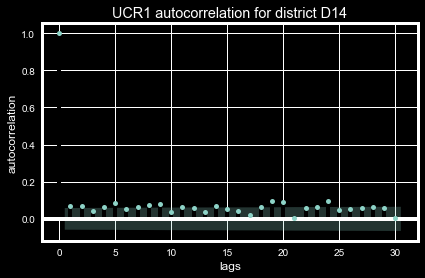

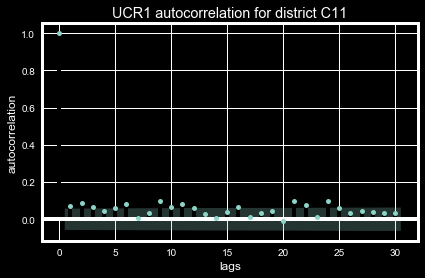

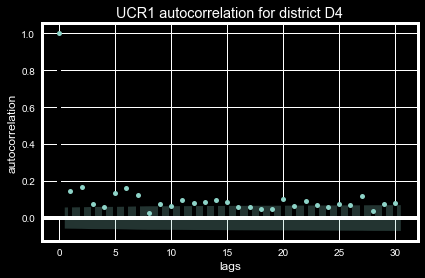

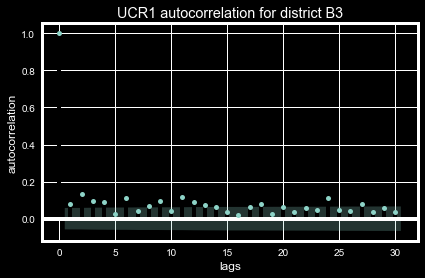

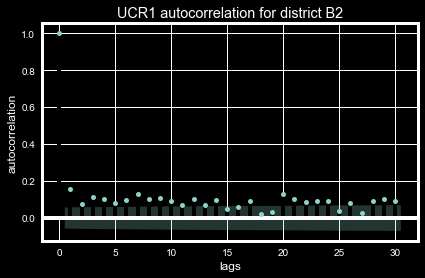

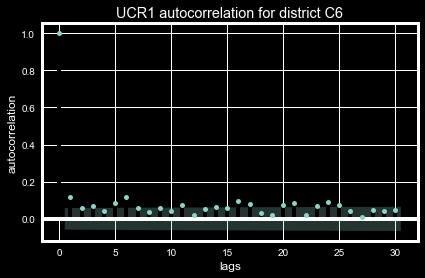

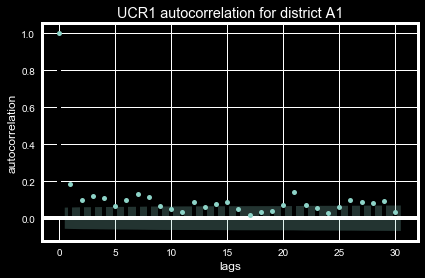

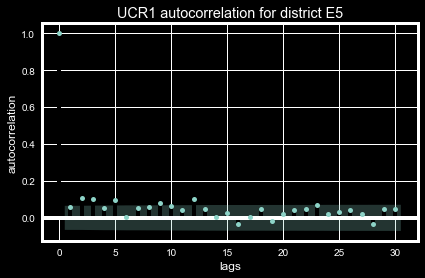

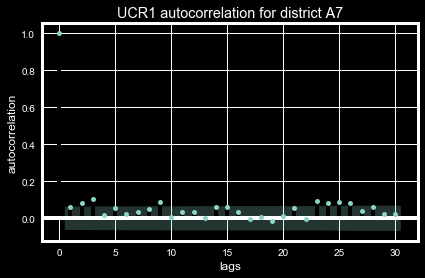

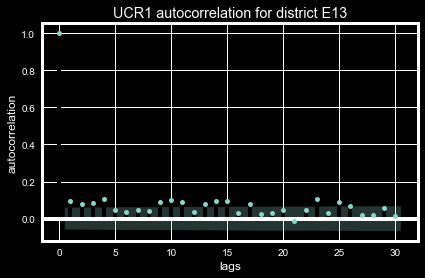

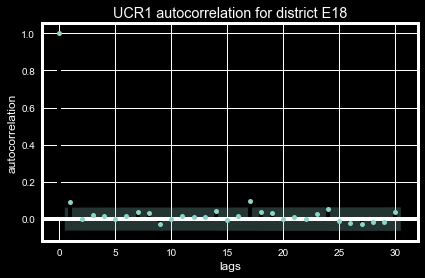

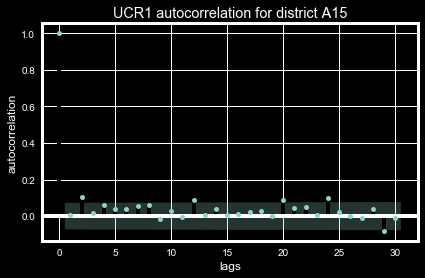

In [130]:
for district in districts:
    plot_acf(ucr1_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR1 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR1_{}'.format(district))

##### Do it for UCR2

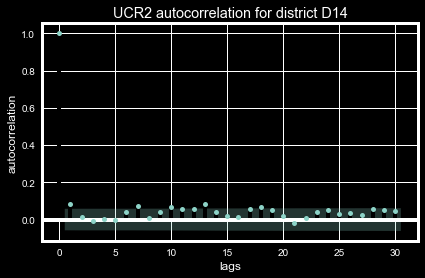

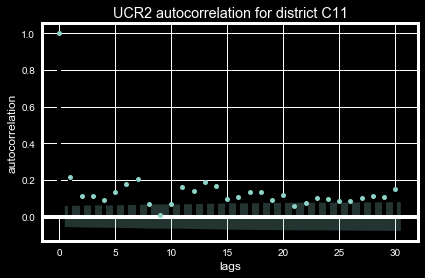

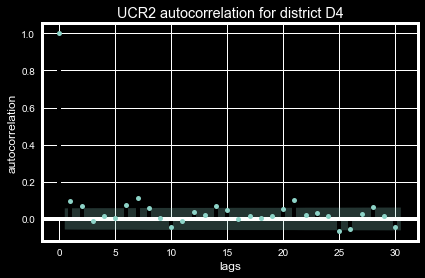

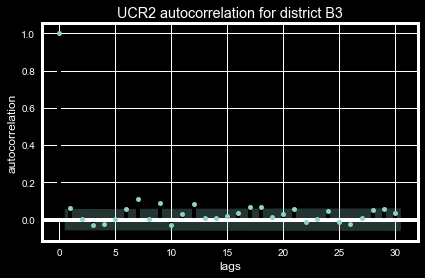

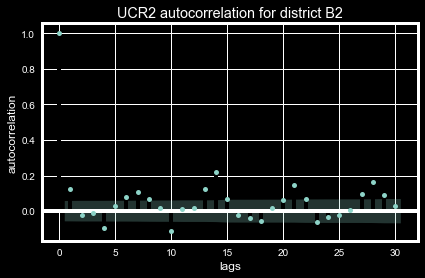

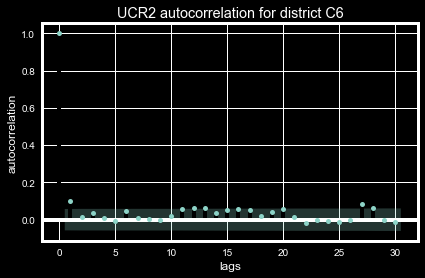

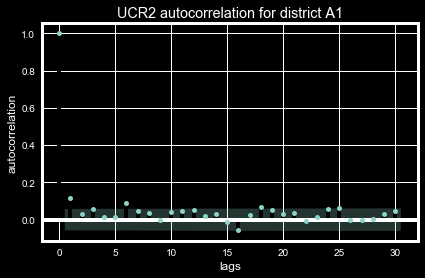

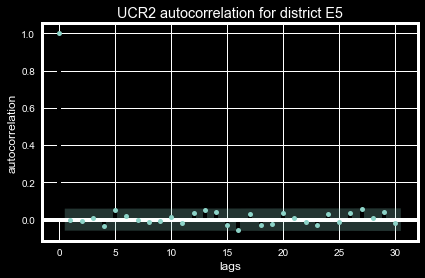

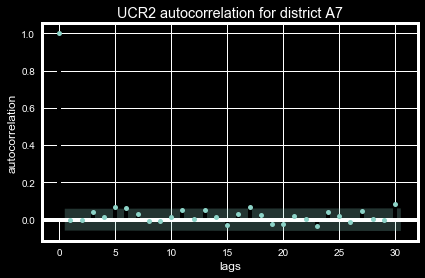

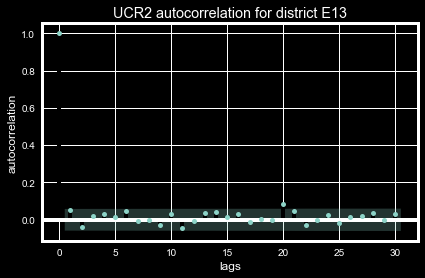

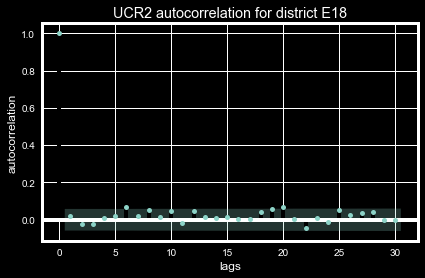

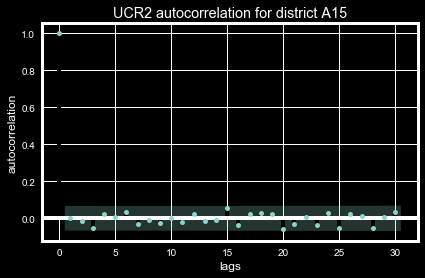

In [131]:
for district in districts:
    plot_acf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR2 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR2_{}'.format(district))


##### Do it for UCR3

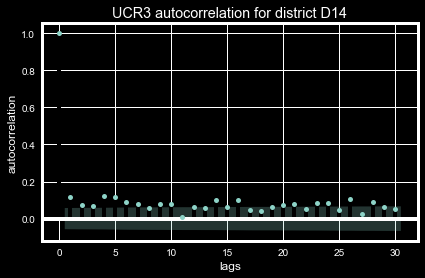

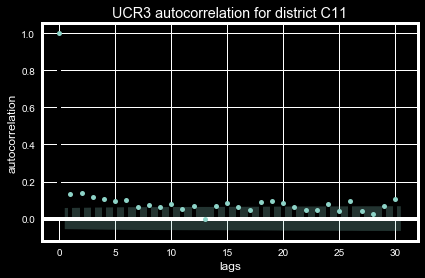

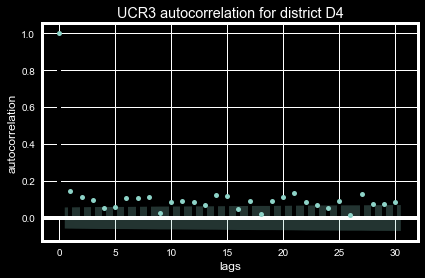

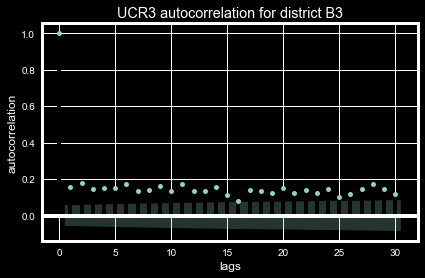

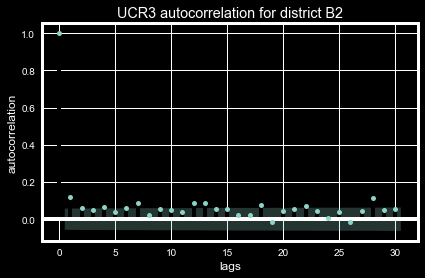

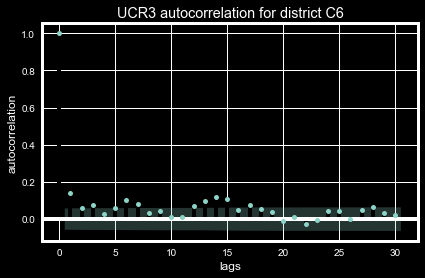

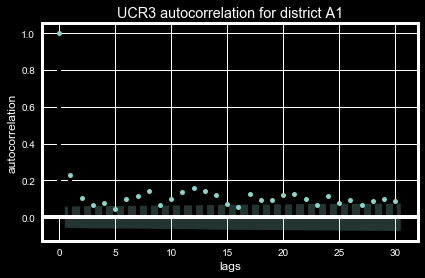

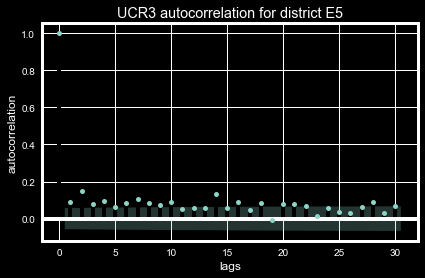

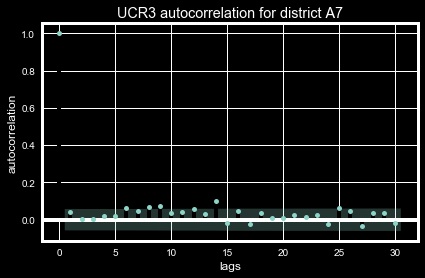

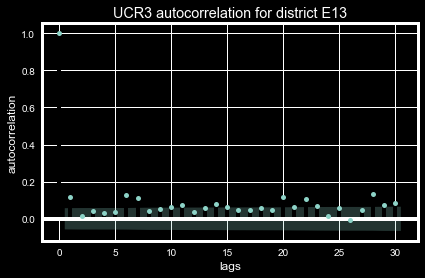

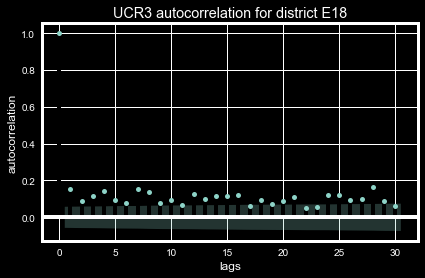

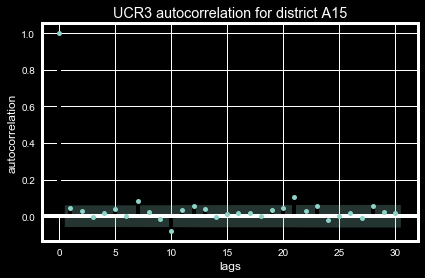

In [132]:
for district in districts:
    plot_acf(ucr3_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR3 autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/ACF/ACF_UCR3_{}'.format(district))

### Time for partial autocorrelations

##### Do it for UCR1

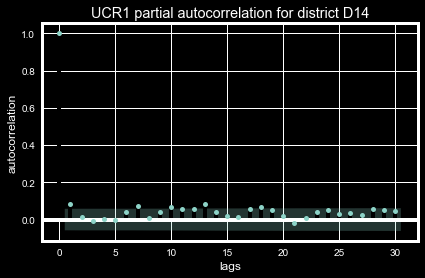

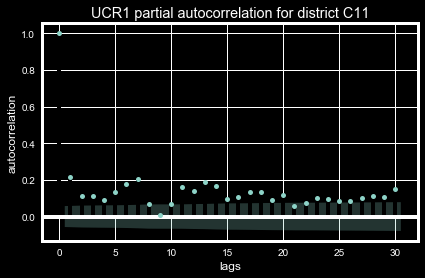

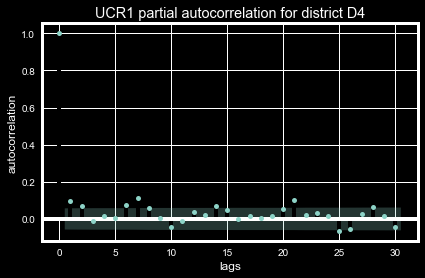

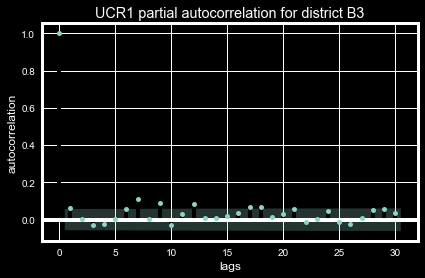

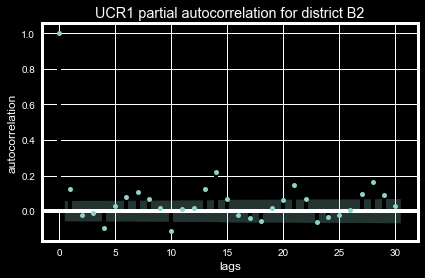

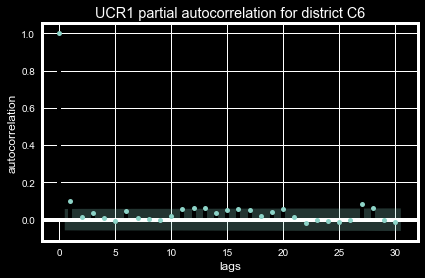

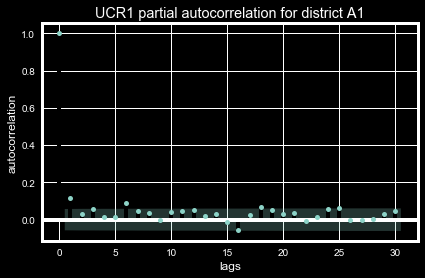

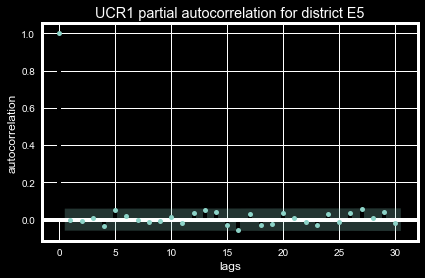

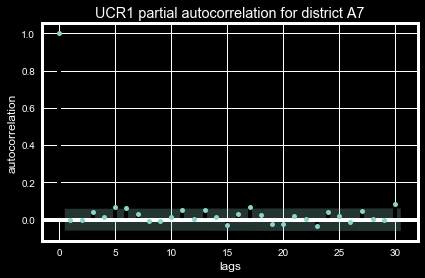

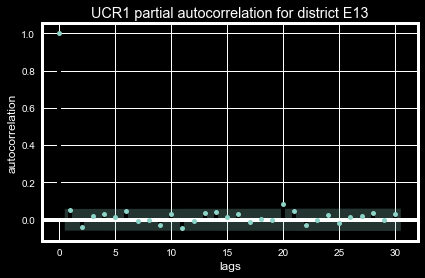

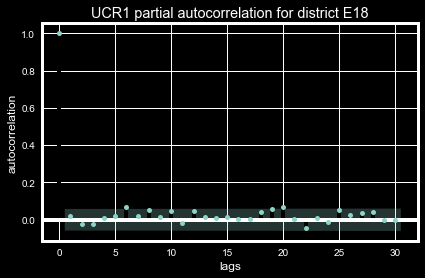

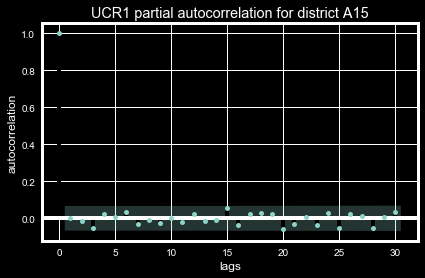

In [111]:
for district in districts:
    plot_acf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR1 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR1_{}'.format(district))

##### Do it for UCR2

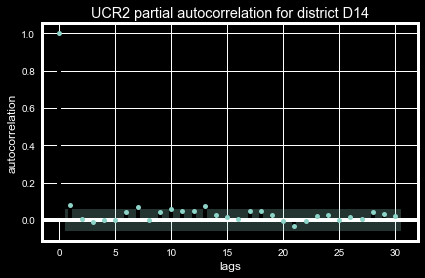

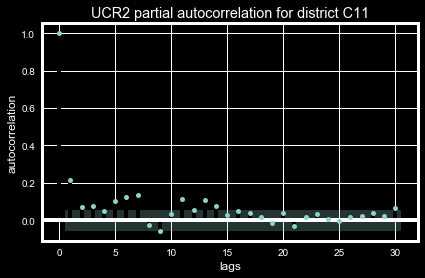

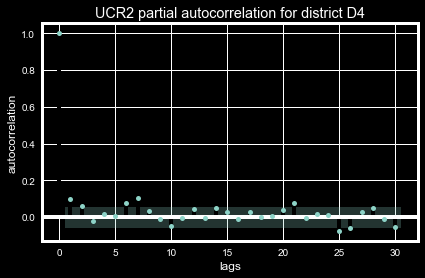

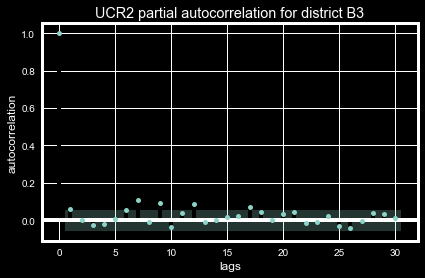

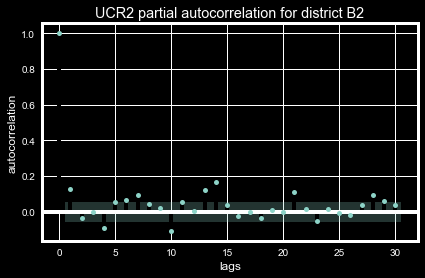

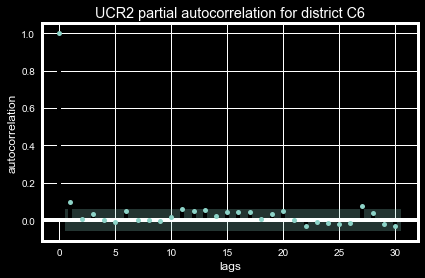

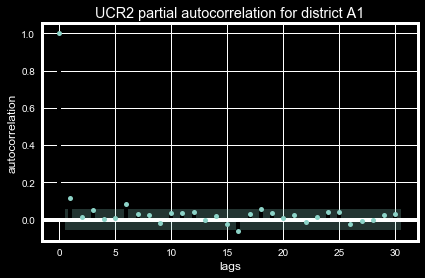

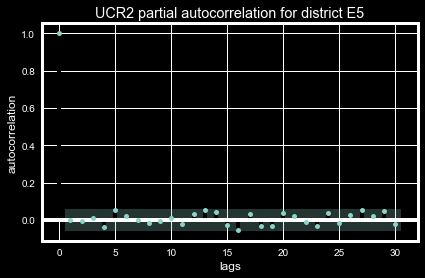

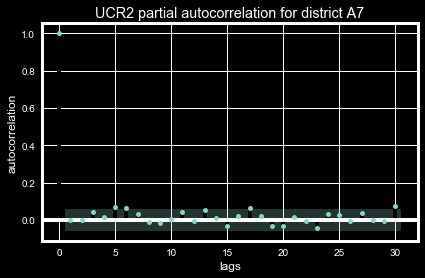

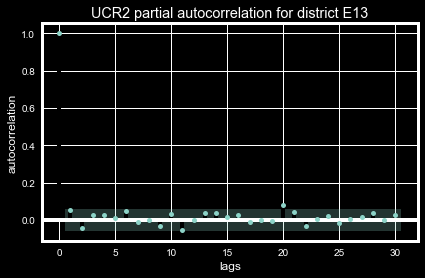

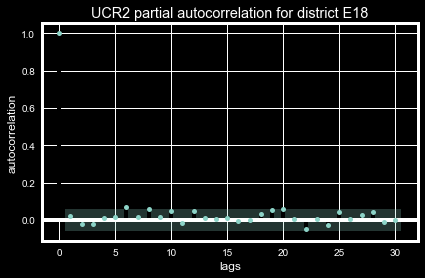

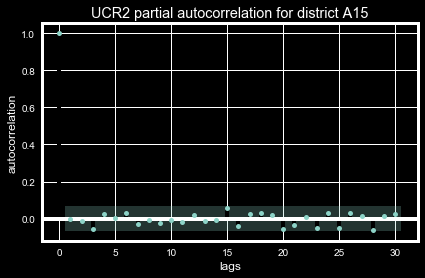

In [112]:
for district in districts:
    plot_pacf(ucr2_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR2 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR2_{}'.format(district))

##### Do it for UCR3

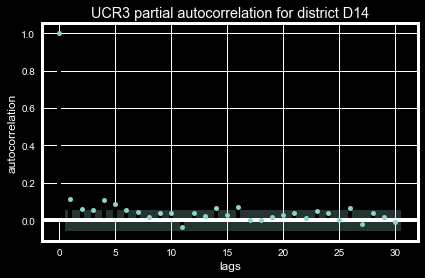

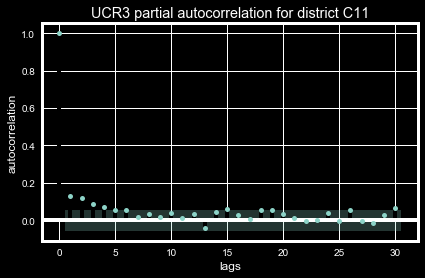

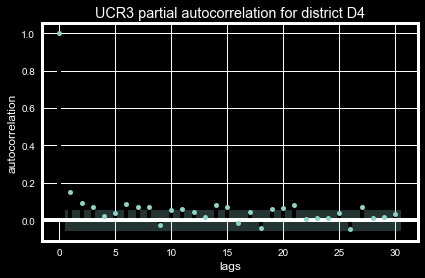

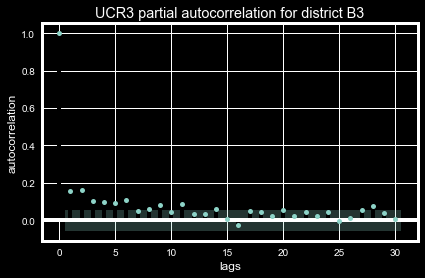

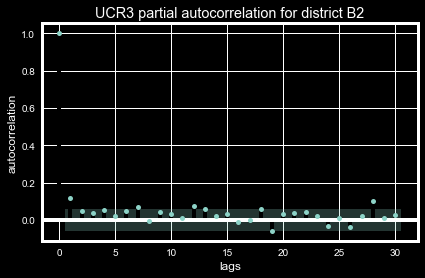

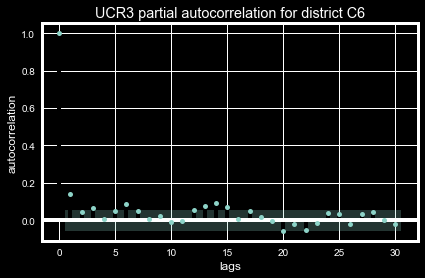

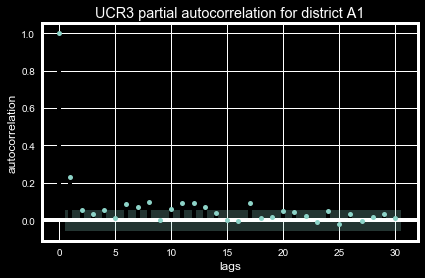

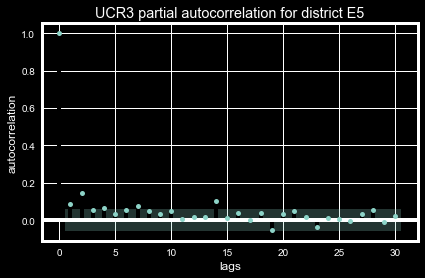

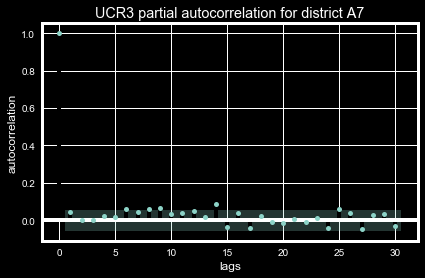

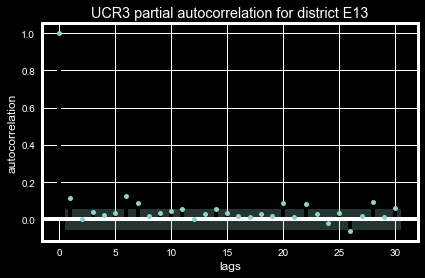

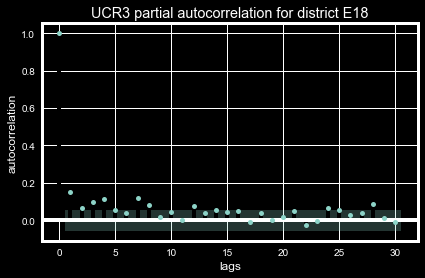

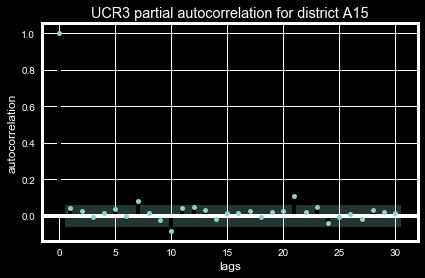

In [113]:
for district in districts:
    plot_pacf(ucr3_districts[district], lags=30, alpha=0.05)
    plt.xlabel('lags')
    plt.ylabel('autocorrelation')
    plt.title('UCR3 partial autocorrelation for district {}'.format(district))
    plt.savefig('/Users/macbookair/GitKraken/BostonCrime/PACF/PACF_UCR3_{}'.format(district))